In [1930]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.feature_selection import RFE
from scipy import stats
from scipy.stats import skew, skewtest, norm
import datetime
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

In [1931]:
# reading the dataset
house_price = pd.read_csv("train.csv")

In [1932]:
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            

In [1933]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [1934]:
# Checking the percentage of missing values
col_list = house_price.columns

for col_name in house_price.columns:
    missing_percent = round(100* ((house_price[col_name].isnull()) | (house_price[col_name].astype(str) == 'Select')).sum() /len(house_price.index) , 2)
    print(col_name + " - " + str(missing_percent))

Id - 0.0
MSSubClass - 0.0
MSZoning - 0.0
LotFrontage - 17.74
LotArea - 0.0
Street - 0.0
Alley - 93.77
LotShape - 0.0
LandContour - 0.0
Utilities - 0.0
LotConfig - 0.0
LandSlope - 0.0
Neighborhood - 0.0
Condition1 - 0.0
Condition2 - 0.0
BldgType - 0.0
HouseStyle - 0.0
OverallQual - 0.0
OverallCond - 0.0
YearBuilt - 0.0
YearRemodAdd - 0.0
RoofStyle - 0.0
RoofMatl - 0.0
Exterior1st - 0.0
Exterior2nd - 0.0
MasVnrType - 0.55
MasVnrArea - 0.55
ExterQual - 0.0
ExterCond - 0.0
Foundation - 0.0
BsmtQual - 2.53
BsmtCond - 2.53
BsmtExposure - 2.6
BsmtFinType1 - 2.53
BsmtFinSF1 - 0.0
BsmtFinType2 - 2.6
BsmtFinSF2 - 0.0
BsmtUnfSF - 0.0
TotalBsmtSF - 0.0
Heating - 0.0
HeatingQC - 0.0
CentralAir - 0.0
Electrical - 0.07
1stFlrSF - 0.0
2ndFlrSF - 0.0
LowQualFinSF - 0.0
GrLivArea - 0.0
BsmtFullBath - 0.0
BsmtHalfBath - 0.0
FullBath - 0.0
HalfBath - 0.0
BedroomAbvGr - 0.0
KitchenAbvGr - 0.0
KitchenQual - 0.0
TotRmsAbvGrd - 0.0
Functional - 0.0
Fireplaces - 0.0
FireplaceQu - 47.26
GarageType - 5.55
Garage

Dropping the columns having way too many missing values - Alley, PoolQC, Fence, MiscFeature, FireplaceQu

In [1935]:
house_price.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu'], axis=1, inplace=True)

In [1936]:
#round(house_price.LotFrontage.mean())

Lot Frontage contains around 18% missing values which we will Delete.

In [1937]:
#house_price.loc[house_price.LotFrontage.isnull(),'LotFrontage'] = round(house_price.LotFrontage.mean())
house_price=house_price.loc[~(house_price.LotFrontage.isnull())]

In [1938]:
house_price.MasVnrType.value_counts()

None       728
BrkFace    339
Stone      119
BrkCmn       9
Name: MasVnrType, dtype: int64

In [1939]:
sum(house_price.MasVnrType.isnull())

6

Deleting rows with missing values of MasVnrType.

In [1940]:
#house_price.loc[house_price.MasVnrType.isnull(),'MasVnrType'] = 'None'
house_price=house_price.loc[~(house_price.MasVnrType.isnull())]

In [1941]:
house_price.MasVnrArea.value_counts()

0.0       727
108.0       7
16.0        7
80.0        6
72.0        6
120.0       6
320.0       5
340.0       5
200.0       5
132.0       5
106.0       5
360.0       5
160.0       4
168.0       4
180.0       4
84.0        4
100.0       4
246.0       4
183.0       4
270.0       4
300.0       4
268.0       4
74.0        3
216.0       3
130.0       3
208.0       3
99.0        3
420.0       3
226.0       3
350.0       3
         ... 
328.0       1
324.0       1
212.0       1
150.0       1
53.0        1
24.0        1
365.0       1
562.0       1
202.0       1
259.0       1
766.0       1
207.0       1
153.0       1
255.0       1
378.0       1
278.0       1
387.0       1
604.0       1
594.0       1
506.0       1
760.0       1
299.0       1
205.0       1
167.0       1
309.0       1
1129.0      1
651.0       1
230.0       1
293.0       1
567.0       1
Name: MasVnrArea, Length: 282, dtype: int64

In [1942]:
sum(house_price.MasVnrArea.isnull())

0

Deleting rows with missing values of MasVnrArea.

In [1943]:
#house_price.loc[house_price.MasVnrArea.isnull(),'MasVnrArea'] = 0
house_price=house_price.loc[~(house_price.MasVnrArea.isnull())]

In [1944]:
house_price.BsmtQual.value_counts()

TA    534
Gd    483
Ex    113
Fa     34
Name: BsmtQual, dtype: int64

In [1945]:

sum(house_price.BsmtQual.isnull())

31

Deleting rows with missing values of BsmtQual.

In [1946]:
#house_price.loc[house_price.BsmtQual.isnull(),'BsmtQual'] = 'TA'
house_price=house_price.loc[~(house_price.BsmtQual.isnull())]

In [1947]:
house_price.BsmtCond.value_counts()

TA    1067
Gd      53
Fa      43
Po       1
Name: BsmtCond, dtype: int64

In [1948]:
sum(house_price.BsmtCond.isnull())

0

Deleting rows with missing values of BsmtCond.

In [1949]:
#house_price.loc[house_price.BsmtCond.isnull(),'BsmtCond'] = 'TA'
house_price=house_price.loc[~(house_price.BsmtCond.isnull())]

In [1950]:
house_price.BsmtExposure.value_counts()

No    788
Av    182
Gd    102
Mn     91
Name: BsmtExposure, dtype: int64

In [1951]:
sum(house_price.BsmtExposure.isnull())

1

In [1952]:
#house_price.loc[house_price.BsmtExposure.isnull(),'BsmtExposure'] = 'No'
house_price=house_price.loc[~(house_price.BsmtExposure.isnull())]

In [1953]:
house_price.BsmtFinType1.value_counts()

Unf    376
GLQ    333
ALQ    172
Rec    111
BLQ    110
LwQ     61
Name: BsmtFinType1, dtype: int64

In [1954]:
sum(house_price.BsmtFinType1.isnull())

0

Deleting rows with missing values of BsmtFinType1.

In [1955]:
#house_price.loc[house_price.BsmtFinType1.isnull(),'BsmtFinType1'] = 'Unf'
house_price=house_price.loc[~(house_price.BsmtFinType1.isnull())]

In [1956]:
house_price.BsmtFinType2.value_counts()

Unf    1036
Rec      38
LwQ      35
BLQ      26
GLQ      14
ALQ      13
Name: BsmtFinType2, dtype: int64

In [1957]:
sum(house_price.BsmtFinType2.isnull())

1

Deleting rows with missing values of BsmtFinType2.

In [1958]:

#house_price.loc[house_price.BsmtFinType2.isnull(),'BsmtFinType2'] = 'Unf'
house_price=house_price.loc[~(house_price.BsmtFinType2.isnull())]

In [1959]:
house_price.Electrical.value_counts()

SBrkr    1063
FuseA      76
FuseF      19
FuseP       2
Mix         1
Name: Electrical, dtype: int64

In [1960]:
sum(house_price.Electrical.isnull())

1

Deleting rows with missing values of Electrical.

In [1961]:
#house_price.loc[house_price.Electrical.isnull(),'Electrical'] = 'SBrkr'
house_price=house_price.loc[~(house_price.Electrical.isnull())]

In [1962]:
#GarageType - 5.55
#GarageYrBlt - 5.55
#GarageFinish - 5.55
#GarageQual - 5.55
#GarageCond - 5.55
house_price.GarageType.value_counts()

Attchd     680
Detchd     325
BuiltIn     63
Basment     15
CarPort      6
2Types       5
Name: GarageType, dtype: int64

In [1963]:
sum(house_price.GarageType.isnull())

67

Deleting rows with missing values of GarageType.

In [1964]:
#house_price.loc[house_price.GarageType.isnull(),'GarageType'] = 'Attchd'
house_price=house_price.loc[~(house_price.GarageType.isnull())]

In [1965]:
sum(house_price.GarageYrBlt.isnull())

0

In [1966]:
len(house_price)

1094

In [1967]:
len(house_price.loc[house_price.YearBuilt == house_price.GarageYrBlt])

852

In [1968]:
len(house_price.loc[house_price.YearBuilt != house_price.GarageYrBlt])

242

For Most of the records, year built and Garage built are the same year, hence we will populate yearbuilt into Garagebuilt for records where garagebuilt is null.

In [1969]:
house_price.loc[house_price.GarageYrBlt.isnull(),'GarageYrBlt'] = house_price.loc[house_price.GarageYrBlt.isnull(),'YearBuilt']

In [1970]:
house_price.GarageFinish.value_counts()

Unf    485
RFn    333
Fin    276
Name: GarageFinish, dtype: int64

In [1971]:
sum(house_price.GarageFinish.isnull())

0

Deleting rows with missing values of GarageFinish.

In [1972]:
#house_price.loc[house_price.GarageFinish.isnull(),'GarageFinish'] = 'Unf'
house_price=house_price.loc[~(house_price.GarageFinish.isnull())]

In [1973]:
house_price.GarageQual.value_counts()

TA    1031
Fa      46
Gd      11
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [1974]:
sum(house_price.GarageQual.isnull())

0

Deleting rows with missing values of GarageQual.

In [1975]:
#house_price.loc[house_price.GarageQual.isnull(),'GarageQual'] = 'TA'
house_price=house_price.loc[~(house_price.GarageQual.isnull())]

In [1976]:
house_price.GarageCond.value_counts()

TA    1050
Fa      31
Po       6
Gd       5
Ex       2
Name: GarageCond, dtype: int64

In [1977]:
sum(house_price.GarageCond.isnull())

0

Deleting rows with missing values of GarageCond.

In [1978]:
#house_price.loc[house_price.GarageCond.isnull(),'GarageCond'] = 'TA'
house_price=house_price.loc[~(house_price.GarageCond.isnull())]

#### Exploratory Data Analysis

Now all null values have either been imputed/deleted/columns dropped. 

So lets move to Exploratory Data Analysis. 

As we do it, we will simultaniously remove outliers for continuous variables if we find any.

Also after outlier treatment, if the columns data lacks variability, we will drop such columns and retain the outlier rows.

In [1979]:
house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPo

In [1980]:
house_price.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType  \
0    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
1    AllPub       FR2       Gtl      Veenker      Feedr       Norm     1Fam   
2    AllPub    Inside       Gtl      CollgCr       Norm       Norm     1Fam   
3    AllPub    Corner       Gtl      Crawfor       Norm       Norm     1Fam   
4    AllPub       FR2       Gtl      NoRidge       Norm       Norm     1Fam   

  HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle  \
0     2Story            7            5       2003          2003     Gable   
1     1Story            6            8       1976          1976     Gable   
2     2Story            7            5       2001          2002     Gable   
3     2Story            7            5       1915          1970     Gable   
4     2Story            8            5       2000          2000     Gable   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   
3  CompShg     Wd Sdng     Wd Shng       None         0.0        TA        TA   
4  CompShg     VinylSd     VinylSd    BrkFace       350.0        Gd        TA   

  Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1  \
0      PConc       Gd       TA           No          GLQ         706   
1     CBlock       Gd       TA           Gd          ALQ         978   
2      PConc       Gd       TA           Mn          GLQ         486   
3     BrkTil       TA       Gd           No          ALQ         216   
4      PConc       Gd       TA           Av          GLQ         655   

  BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0          Unf           0        150          856    GasA        Ex   
1          Unf           0        284         1262    GasA        Ex   
2          Unf           0        434          920    GasA        Ex   
3          Unf           0        540          756    GasA        Gd   
4          Unf           0        490         1145    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   
3          Y      SBrkr       961       756             0       1717   
4          Y      SBrkr      1145      1053             0       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

  KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  GarageYrBlt  \
0          Gd             8        Typ           0     Attchd       2003.0   
1          TA             6        Typ           1     Attchd       1976.0   
2          Gd             6        Typ           1     Attchd       2001.0   

#### MSSubClass against SalePrice

20	1-STORY 1946 & NEWER ALL STYLES

30	1-STORY 1945 & OLDER

40	1-STORY W/FINISHED ATTIC ALL AGES

45	1-1/2 STORY - UNFINISHED ALL AGES

50	1-1/2 STORY FINISHED ALL AGES

60	2-STORY 1946 & NEWER

70	2-STORY 1945 & OLDER

75	2-1/2 STORY ALL AGES

80	SPLIT OR MULTI-LEVEL

85	SPLIT FOYER

90	DUPLEX - ALL STYLES AND AGES

120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER

150	1-1/2 STORY PUD - ALL AGES

160	2-STORY PUD - 1946 & NEWER

180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER

190	2 FAMILY CONVERSION - ALL STYLES AND AGES

In [1981]:
house_price.MSSubClass.value_counts()

20     411
60     227
50     114
120     66
160     53
70      52
30      47
80      37
90      24
190     19
85      13
75      13
45       9
180      6
40       3
Name: MSSubClass, dtype: int64

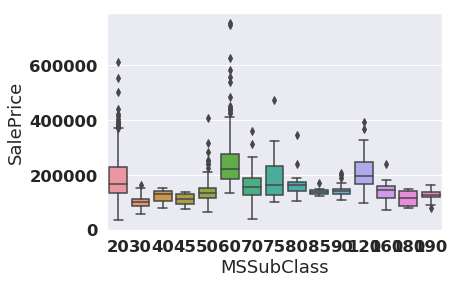

In [1982]:
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = house_price)

#### MSZoning against SalePrice
A	Agriculture

C	Commercial

FV	Floating Village Residential

I	Industrial

RH	Residential High Density

RL	Residential Low Density

RP	Residential Low Density Park 

RM	Residential Medium Density


In [1983]:
house_price.MSZoning.value_counts()

RL         850
RM         173
FV          54
RH           9
C (all)      8
Name: MSZoning, dtype: int64

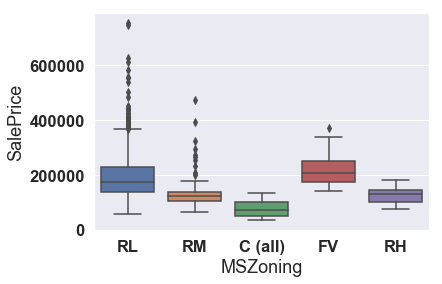

In [1984]:
sns.set(font_scale=1.5)
sns.boxplot(x = 'MSZoning', y = 'SalePrice', data = house_price)

#### LotFrontage against SalePrice

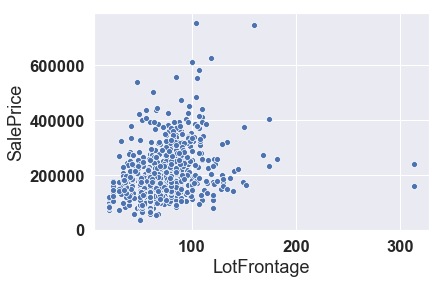

In [1985]:
sns.scatterplot(x='LotFrontage', y='SalePrice', data=house_price)

Outlier check and removal for LotFrontage

In [1986]:
# outlier treatment for LotFrontage
house_price = house_price.loc[house_price.LotFrontage < 200]

#sns.set(font_scale = 1)
#plt.boxplot(house_price.LotFrontage)
#Q1 = house_price.LotFrontage.quantile(0.25)
#Q3 = house_price.LotFrontage.quantile(0.75)
#IQR = Q3 - Q1
#house_price_LotFrontage_outliers = house_price[(house_price.LotFrontage < Q1 - 1.5*IQR) | (house_price.LotFrontage > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.LotFrontage >= Q1 - 1.5*IQR) & (house_price.LotFrontage <= Q3 + 1.5*IQR)]

#### LotArea against SalePrice

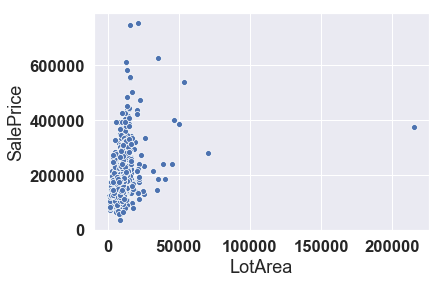

In [1987]:
sns.scatterplot(x='LotArea', y='SalePrice', data=house_price)

Outlier check and removal for LotArea

In [1988]:
# outlier treatment for LotArea

house_price = house_price.loc[house_price.LotArea < 200000]

#sns.set(font_scale = 1)
#plt.boxplot(house_price.LotArea)
#Q1 = house_price.LotArea.quantile(0.25)
#Q3 = house_price.LotArea.quantile(0.75)
#IQR = Q3 - Q1
#house_price_LotArea_outliers = house_price[(house_price.LotArea < Q1 - 1.5*IQR) | (house_price.LotArea > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.LotArea >= Q1 - 1.5*IQR) & (house_price.LotArea <= Q3 + 1.5*IQR)]

#### Street against SalePrice

Grvl	Gravel	
Pave	Paved

In [1989]:
house_price.Street.value_counts()

Pave    1087
Grvl       4
Name: Street, dtype: int64

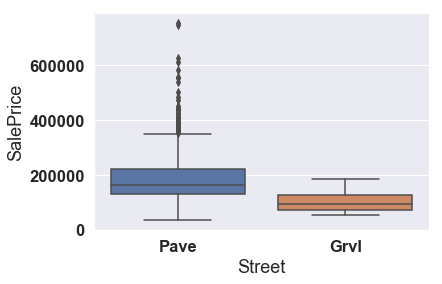

In [1990]:
sns.boxplot(x = 'Street', y = 'SalePrice', data = house_price)

Since this column does not have much variability in data, we will drop it.

In [1991]:
house_price.drop('Street',axis=1,inplace=True)

#### LotShape against SalePrice

General shape of property

Reg	Regular	

IR1	Slightly irregular

IR2	Moderately Irregular

IR3	Irregular

In [1992]:
house_price.LotShape.value_counts()

Reg    760
IR1    301
IR2     25
IR3      5
Name: LotShape, dtype: int64

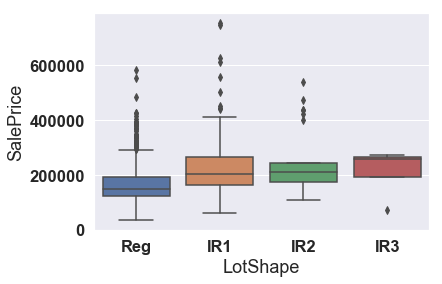

In [1993]:
sns.boxplot(x = 'LotShape', y = 'SalePrice', data = house_price)

#### LandContour against SalePrice
Flatness of the property

Lvl	- Near Flat/Level	

Bnk	Banked - Quick and significant rise from street grade to building

HLS	Hillside - Significant slope from side to side

Low	- Depression

In [1994]:
house_price.LandContour.value_counts()

Lvl    991
Bnk     44
HLS     43
Low     13
Name: LandContour, dtype: int64

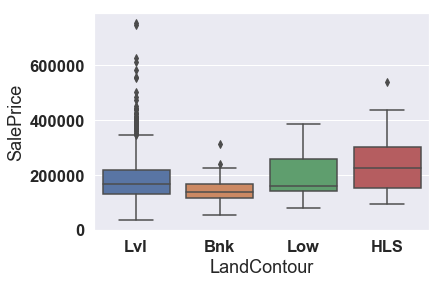

In [1995]:
sns.boxplot(x = 'LandContour', y = 'SalePrice', data = house_price)

#### Utilities against SalePrice

Type of utilities available

AllPub - All public Utilities (E,G,W,& S)

NoSewr - Electricity, Gas, and Water (Septic Tank)

NoSeWa - Electricity and Gas Only

ELO - Electricity only

In [1996]:
house_price.Utilities.value_counts()

AllPub    1091
Name: Utilities, dtype: int64

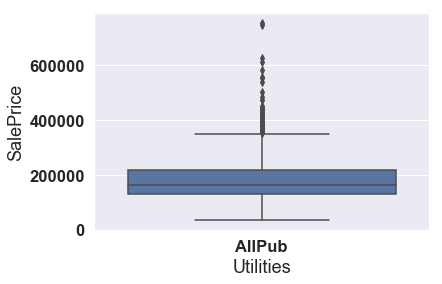

In [1997]:
sns.boxplot(x = 'Utilities', y = 'SalePrice', data = house_price)

Since this column doesnt have much variability, we will drop Utilities.

In [1998]:
house_price.drop('Utilities',axis=1,inplace=True)

#### LotConfig against SalePrice

Lot configuration

Inside	Inside lot

Corner	Corner lot

CulDSac	Cul-de-sac

FR2	Frontage on 2 sides of property

FR3	Frontage on 3 sides of property

In [1999]:
house_price.LotConfig.value_counts()

Inside     828
Corner     186
CulDSac     44
FR2         29
FR3          4
Name: LotConfig, dtype: int64

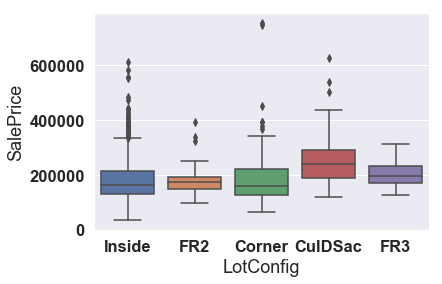

In [2000]:
sns.boxplot(x = 'LotConfig', y = 'SalePrice', data = house_price)

#### LandSlope against SalePrice

Slope of property

Gtl	Gentle slope

Mod	Moderate Slope	

Sev	Severe Slope

In [2001]:
house_price.LandSlope.value_counts()

Gtl    1044
Mod      43
Sev       4
Name: LandSlope, dtype: int64

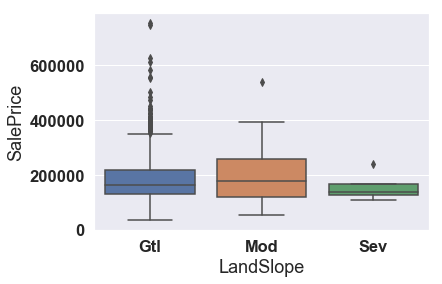

In [2002]:
sns.boxplot(x = 'LandSlope', y = 'SalePrice', data = house_price)

#### Neighborhood against SalePrice
Physical locations within Ames city limits

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker

In [2003]:
house_price.Neighborhood.value_counts()

NAmes      172
CollgCr    122
OldTown     96
Somerst     75
NridgHt     74
Edwards     64
Gilbert     49
NWAmes      45
Sawyer      44
SawyerW     44
BrkSide     42
Crawfor     41
NoRidge     33
Mitchel     30
Timber      28
IDOTRR      27
StoneBr     20
SWISU       19
BrDale      15
Blmngtn     14
ClearCr     11
MeadowV     10
Veenker      7
NPkVill      7
Blueste      2
Name: Neighborhood, dtype: int64

[Text(0, 0, 'CollgCr'),
 Text(0, 0, 'Veenker'),
 Text(0, 0, 'Crawfor'),
 Text(0, 0, 'NoRidge'),
 Text(0, 0, 'Mitchel'),
 Text(0, 0, 'Somerst'),
 Text(0, 0, 'OldTown'),
 Text(0, 0, 'BrkSide'),
 Text(0, 0, 'Sawyer'),
 Text(0, 0, 'NridgHt'),
 Text(0, 0, 'SawyerW'),
 Text(0, 0, 'NAmes'),
 Text(0, 0, 'IDOTRR'),
 Text(0, 0, 'MeadowV'),
 Text(0, 0, 'Timber'),
 Text(0, 0, 'StoneBr'),
 Text(0, 0, 'ClearCr'),
 Text(0, 0, 'Gilbert'),
 Text(0, 0, 'Edwards'),
 Text(0, 0, 'NWAmes'),
 Text(0, 0, 'NPkVill'),
 Text(0, 0, 'Blmngtn'),
 Text(0, 0, 'BrDale'),
 Text(0, 0, 'SWISU'),
 Text(0, 0, 'Blueste')]

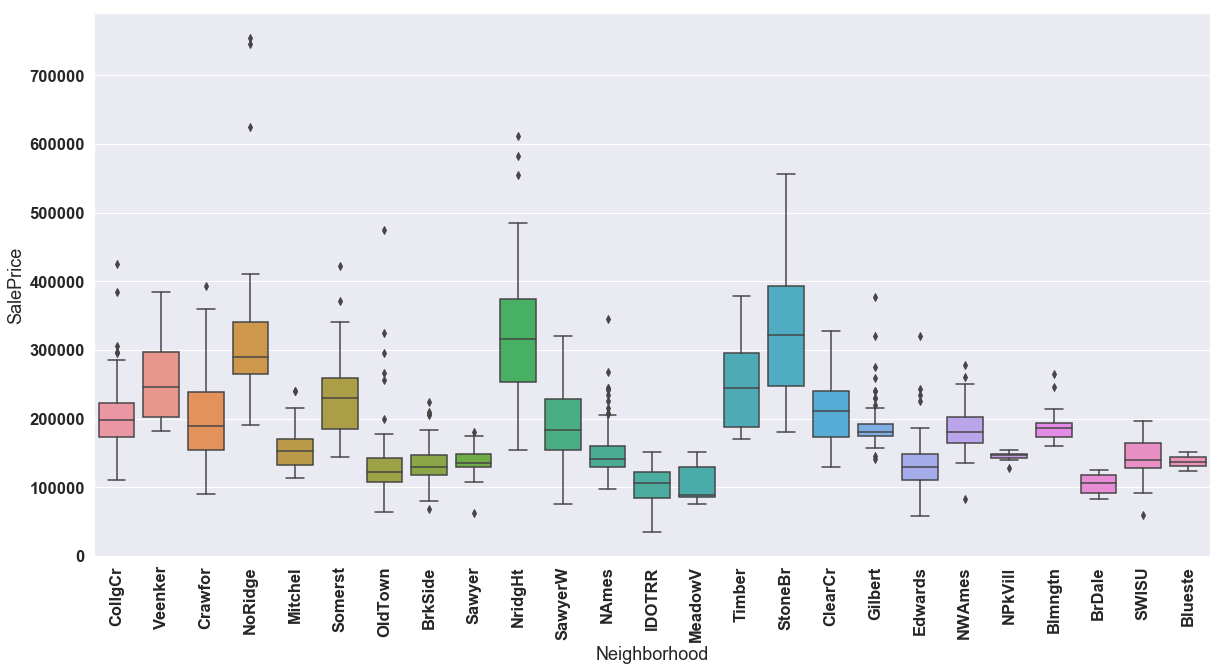

In [2004]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.5)
ax = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = house_price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### Condition1 against SalePrice

Proximity to various conditions
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [2005]:
house_price.Condition1.value_counts()

Norm      949
Feedr      51
Artery     42
RRAn       24
PosN        9
RRAe        8
RRNn        4
PosA        3
RRNe        1
Name: Condition1, dtype: int64

[Text(0, 0, 'Norm'),
 Text(0, 0, 'Feedr'),
 Text(0, 0, 'PosN'),
 Text(0, 0, 'Artery'),
 Text(0, 0, 'RRAe'),
 Text(0, 0, 'RRNn'),
 Text(0, 0, 'RRAn'),
 Text(0, 0, 'PosA'),
 Text(0, 0, 'RRNe')]

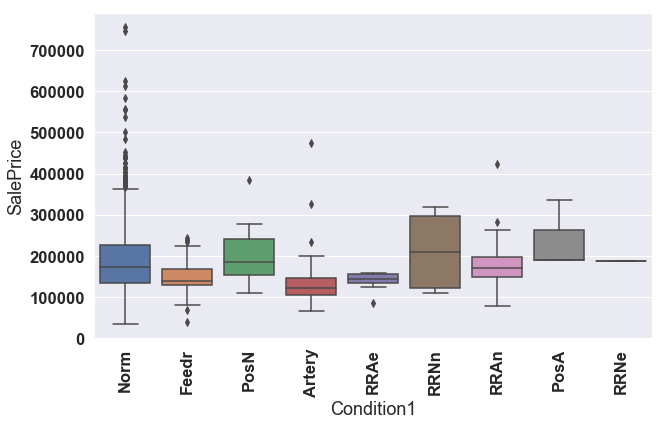

In [2006]:
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x = 'Condition1', y = 'SalePrice', data = house_price, order=['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### Condition2 against SalePrice

Proximity to various conditions (if more than one is present)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad

In [2007]:
house_price.Condition2.value_counts()

Norm      1079
Feedr        5
RRNn         2
Artery       2
PosN         2
PosA         1
Name: Condition2, dtype: int64

[Text(0, 0, 'Norm'),
 Text(0, 0, 'Feedr'),
 Text(0, 0, 'PosN'),
 Text(0, 0, 'Artery'),
 Text(0, 0, 'RRAe'),
 Text(0, 0, 'RRNn'),
 Text(0, 0, 'RRAn'),
 Text(0, 0, 'PosA'),
 Text(0, 0, 'RRNe')]

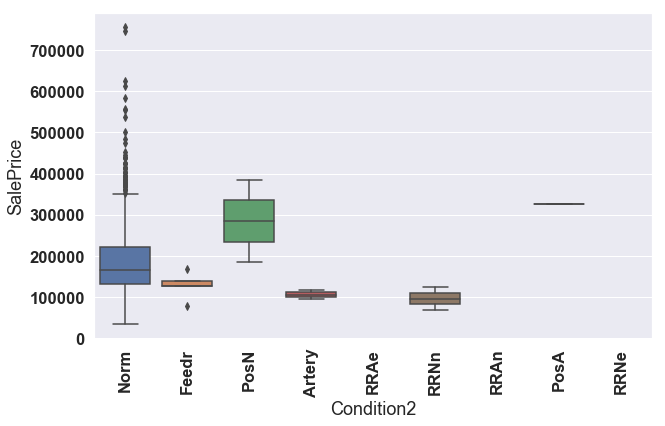

In [2008]:
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x = 'Condition2', y = 'SalePrice', data = house_price, order=['Norm', 'Feedr', 'PosN', 'Artery', 'RRAe', 'RRNn', 'RRAn', 'PosA',
       'RRNe'])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Since this column does not have much variabilityin data, we will drop this column.

In [2009]:
house_price.drop('Condition2',axis=1,inplace=True)

#### BldgType against SalePrice

Type of dwelling
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

In [2010]:
house_price.BldgType.value_counts()

1Fam      922
TwnhsE     90
Twnhs      35
Duplex     24
2fmCon     20
Name: BldgType, dtype: int64

[Text(0, 0, '1Fam'),
 Text(0, 0, '2fmCon'),
 Text(0, 0, 'TwnhsE'),
 Text(0, 0, 'Duplex'),
 Text(0, 0, 'Twnhs')]

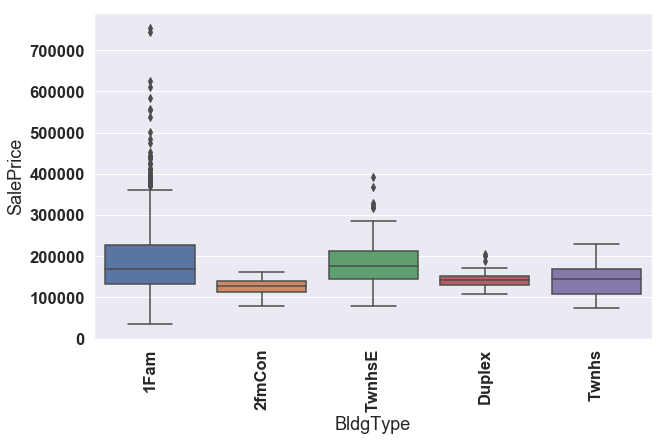

In [2011]:
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x = 'BldgType', y = 'SalePrice', data = house_price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### HouseStyle against SalePrice

Style of dwelling
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

In [2012]:
house_price.HouseStyle.value_counts()

1Story    538
2Story    345
1.5Fin    117
SLvl       43
SFoyer     23
1.5Unf     10
2.5Unf      9
2.5Fin      6
Name: HouseStyle, dtype: int64

[Text(0, 0, '2Story'),
 Text(0, 0, '1Story'),
 Text(0, 0, '1.5Fin'),
 Text(0, 0, '1.5Unf'),
 Text(0, 0, 'SLvl'),
 Text(0, 0, '2.5Unf'),
 Text(0, 0, '2.5Fin'),
 Text(0, 0, 'SFoyer')]

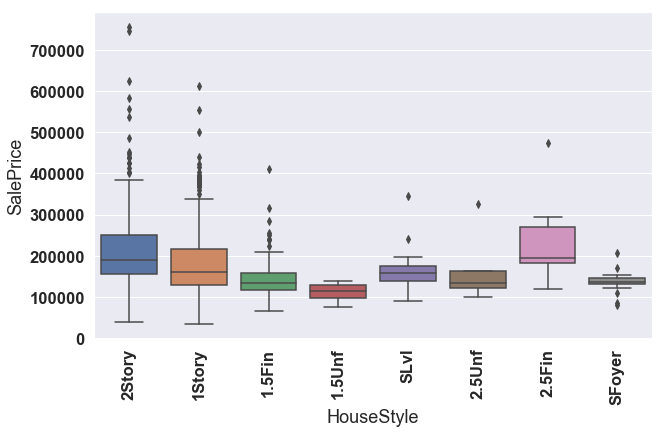

In [2013]:
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = house_price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### OverallQual against SalePrice
Rates the overall material and finish of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

In [2014]:
house_price.OverallQual.value_counts()

5     292
6     270
7     257
8     139
4      66
9      42
10     15
3       8
2       2
Name: OverallQual, dtype: int64

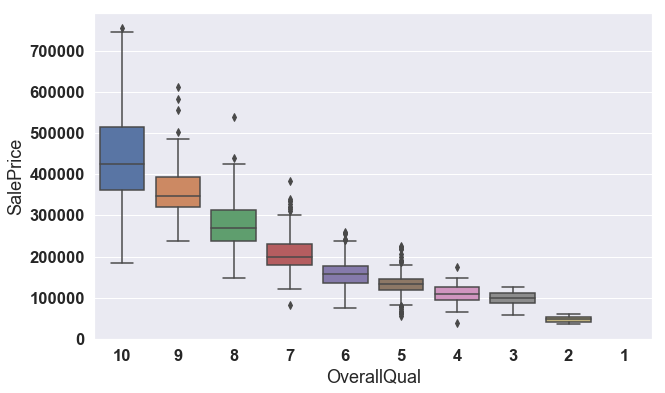

In [2015]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'OverallQual', y = 'SalePrice', data = house_price, order=[10,9,8,7,6,5,4,3,2,1])

#### OverallCond against SalePrice
Rates the overall condition of the house

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

In [2016]:
house_price.OverallCond.value_counts()

5    635
6    189
7    144
8     57
4     37
9     13
3     13
2      3
Name: OverallCond, dtype: int64

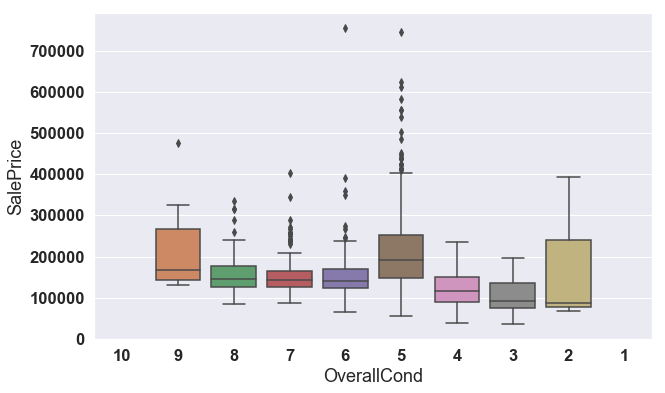

In [2017]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'OverallCond', y = 'SalePrice', data = house_price, order=[10,9,8,7,6,5,4,3,2,1])

#### YearBuilt against SalePrice
Original construction date

In [2018]:
house_price.YearBuilt.value_counts()

2005    64
2006    63
2007    46
2004    46
2003    35
1920    24
2008    22
1999    21
1998    21
1959    20
1954    19
1977    19
1958    19
1976    18
1965    17
1972    17
2009    17
1970    15
1994    15
1957    15
1968    14
1963    14
1995    14
1950    14
1971    13
1962    13
2002    13
1996    13
1925    13
1993    13
        ..
1934     3
1914     3
1932     3
1981     3
1986     3
1947     3
1935     3
1929     3
1927     3
1885     2
1890     2
1892     2
1991     2
1908     2
1989     2
1987     2
1919     2
1983     2
1913     1
1912     1
1917     1
1906     1
1905     1
1904     1
1985     1
1898     1
1893     1
1942     1
1882     1
2010     1
Name: YearBuilt, Length: 109, dtype: int64

[Text(0, 0, '1872'),
 Text(0, 0, '1875'),
 Text(0, 0, '1880'),
 Text(0, 0, '1882'),
 Text(0, 0, '1885'),
 Text(0, 0, '1890'),
 Text(0, 0, '1892'),
 Text(0, 0, '1893'),
 Text(0, 0, '1898'),
 Text(0, 0, '1900'),
 Text(0, 0, '1904'),
 Text(0, 0, '1905'),
 Text(0, 0, '1906'),
 Text(0, 0, '1908'),
 Text(0, 0, '1910'),
 Text(0, 0, '1911'),
 Text(0, 0, '1912'),
 Text(0, 0, '1913'),
 Text(0, 0, '1914'),
 Text(0, 0, '1915'),
 Text(0, 0, '1916'),
 Text(0, 0, '1917'),
 Text(0, 0, '1918'),
 Text(0, 0, '1919'),
 Text(0, 0, '1920'),
 Text(0, 0, '1921'),
 Text(0, 0, '1922'),
 Text(0, 0, '1923'),
 Text(0, 0, '1924'),
 Text(0, 0, '1925'),
 Text(0, 0, '1926'),
 Text(0, 0, '1927'),
 Text(0, 0, '1928'),
 Text(0, 0, '1929'),
 Text(0, 0, '1930'),
 Text(0, 0, '1931'),
 Text(0, 0, '1932'),
 Text(0, 0, '1934'),
 Text(0, 0, '1935'),
 Text(0, 0, '1936'),
 Text(0, 0, '1937'),
 Text(0, 0, '1938'),
 Text(0, 0, '1939'),
 Text(0, 0, '1940'),
 Text(0, 0, '1941'),
 Text(0, 0, '1942'),
 Text(0, 0, '1945'),
 Text(0, 0, '

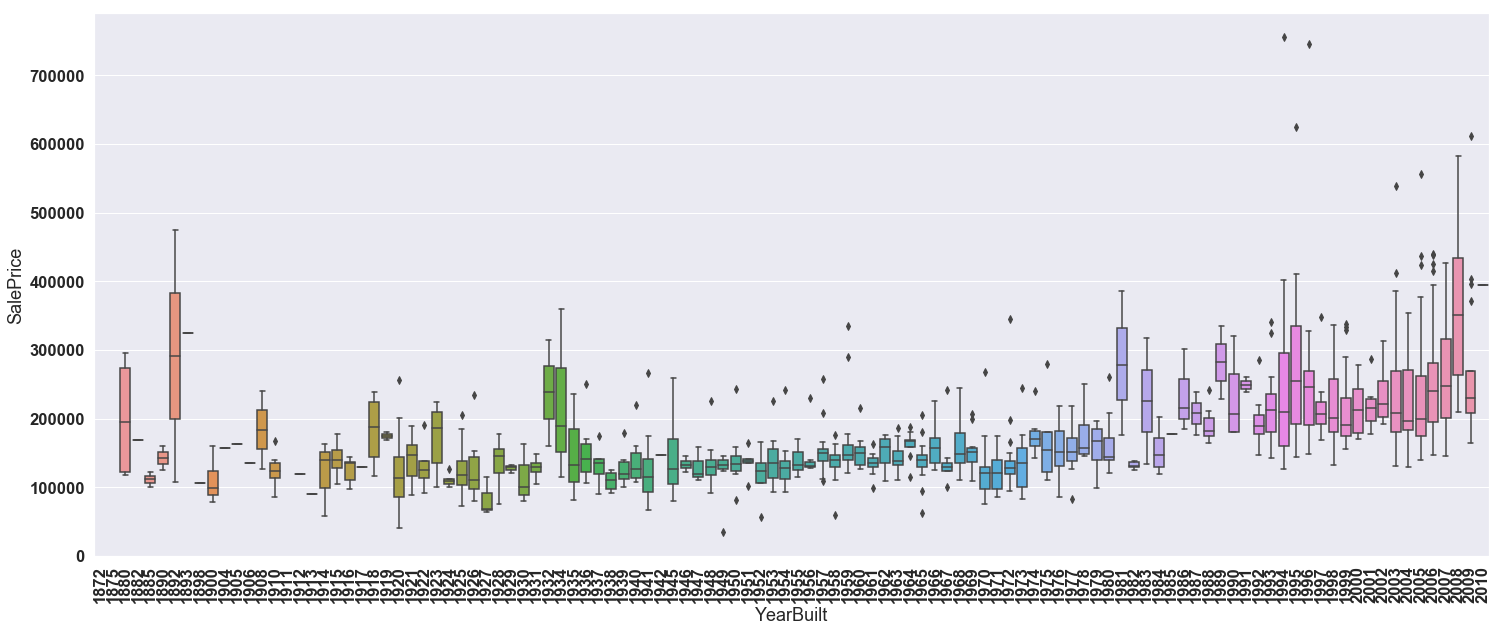

In [2019]:
plt.figure(figsize=(25, 10))
ax = sns.boxplot(x = 'YearBuilt', y = 'SalePrice', data = house_price, order=[1872,1875,1880,1882,1885,1890,1892,1893,1898,1900,1904,1905,1906,1908,1910,1911,1912,1913,1914,1915,1916,1917,1918,1919,1920,1921,1922,1923,1924,1925,1926,1927,1928,1929,1930,1931,1932,1934,1935,1936,1937,1938,1939,1940,1941,1942,1945,1946,1947,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010])
#g.set_xticklabels(rotation=90)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### YearRemodAdd against SalePrice
Remodel date (same as construction date if no remodeling or additions)

In [2020]:
house_price.YearRemodAdd.value_counts()

1950    132
2006     85
2005     69
2007     64
2004     49
2003     37
2000     37
2008     33
2002     31
1998     30
1995     27
1996     26
1999     24
2009     22
1970     19
1997     19
1976     17
1977     17
1994     16
1965     15
1972     15
1993     13
1990     13
1959     13
1992     12
1958     12
1968     12
2001     12
1954     11
1963     11
       ... 
1962     10
1980     10
1991     10
1969      9
1966      9
1973      9
1953      9
1960      9
1957      8
1987      7
1964      7
1978      7
1967      6
1974      6
1989      6
1975      6
1988      6
1956      5
1955      5
2010      5
1961      5
1985      5
1981      5
1979      4
1952      4
1951      4
1984      3
1982      3
1986      3
1983      2
Name: YearRemodAdd, Length: 61, dtype: int64

[Text(0, 0, '1950'),
 Text(0, 0, '1951'),
 Text(0, 0, '1952'),
 Text(0, 0, '1953'),
 Text(0, 0, '1954'),
 Text(0, 0, '1955'),
 Text(0, 0, '1956'),
 Text(0, 0, '1957'),
 Text(0, 0, '1958'),
 Text(0, 0, '1959'),
 Text(0, 0, '1960'),
 Text(0, 0, '1961'),
 Text(0, 0, '1962'),
 Text(0, 0, '1963'),
 Text(0, 0, '1964'),
 Text(0, 0, '1965'),
 Text(0, 0, '1966'),
 Text(0, 0, '1967'),
 Text(0, 0, '1968'),
 Text(0, 0, '1969'),
 Text(0, 0, '1970'),
 Text(0, 0, '1971'),
 Text(0, 0, '1972'),
 Text(0, 0, '1973'),
 Text(0, 0, '1974'),
 Text(0, 0, '1975'),
 Text(0, 0, '1976'),
 Text(0, 0, '1977'),
 Text(0, 0, '1978'),
 Text(0, 0, '1979'),
 Text(0, 0, '1980'),
 Text(0, 0, '1981'),
 Text(0, 0, '1982'),
 Text(0, 0, '1983'),
 Text(0, 0, '1984'),
 Text(0, 0, '1985'),
 Text(0, 0, '1986'),
 Text(0, 0, '1987'),
 Text(0, 0, '1988'),
 Text(0, 0, '1989'),
 Text(0, 0, '1990'),
 Text(0, 0, '1991'),
 Text(0, 0, '1992'),
 Text(0, 0, '1993'),
 Text(0, 0, '1994'),
 Text(0, 0, '1995'),
 Text(0, 0, '1996'),
 Text(0, 0, '

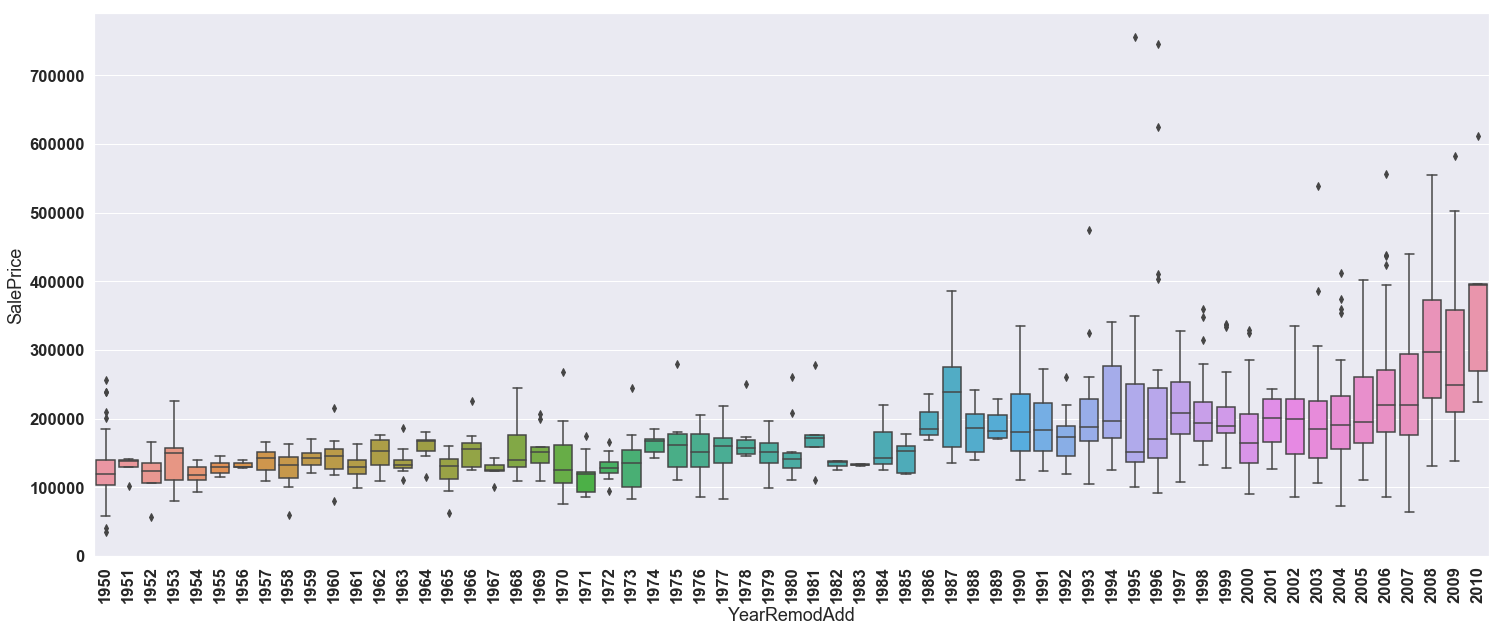

In [2021]:
plt.figure(figsize=(25, 10))
ax = sns.boxplot(x = 'YearRemodAdd', y = 'SalePrice', data = house_price, order=[1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010])
#g.set_xticklabels(rotation=90)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### RoofStyle against SalePrice
Type of roof

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

In [2022]:
house_price.RoofStyle.value_counts()

Gable      843
Hip        228
Gambrel     10
Mansard      6
Flat         4
Name: RoofStyle, dtype: int64

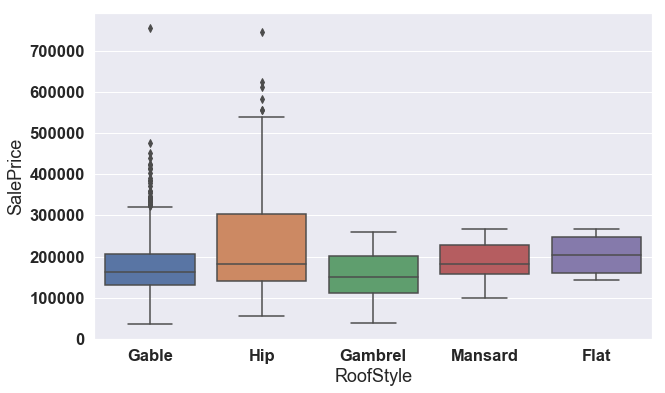

In [2023]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'RoofStyle', y = 'SalePrice', data = house_price)

#### RoofMatl against SalePrice
Roof material

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shinglesm

In [2024]:
house_price.RoofMatl.value_counts()

CompShg    1077
WdShngl       6
Tar&Grv       4
WdShake       2
Roll          1
Membran       1
Name: RoofMatl, dtype: int64

[Text(0, 0, 'CompShg'),
 Text(0, 0, 'WdShngl'),
 Text(0, 0, 'Membran'),
 Text(0, 0, 'WdShake'),
 Text(0, 0, 'Tar&Grv'),
 Text(0, 0, 'Roll')]

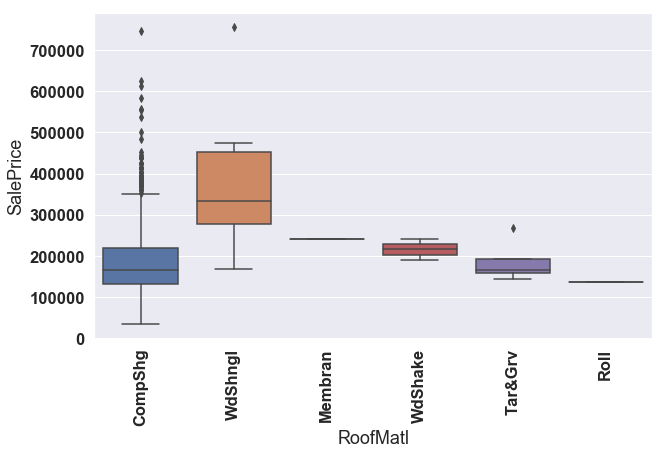

In [2025]:
plt.figure(figsize=(10, 6))
ax=sns.boxplot(x = 'RoofMatl', y = 'SalePrice', data = house_price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

Since this column does not have much variavility in data, we will drop this column.

In [2026]:
house_price.drop('RoofMatl',axis=1,inplace=True)

#### Exterior1st against SalePrice
Exterior covering on house

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

In [2027]:
house_price.Exterior1st.value_counts()

VinylSd    421
MetalSd    172
HdBoard    151
Wd Sdng    148
Plywood     64
CemntBd     45
BrkFace     35
WdShing     20
Stucco      17
AsbShng     14
Stone        1
BrkComm      1
ImStucc      1
CBlock       1
Name: Exterior1st, dtype: int64

[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'WdShing'),
 Text(0, 0, 'CemntBd'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'BrkComm'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'CBlock')]

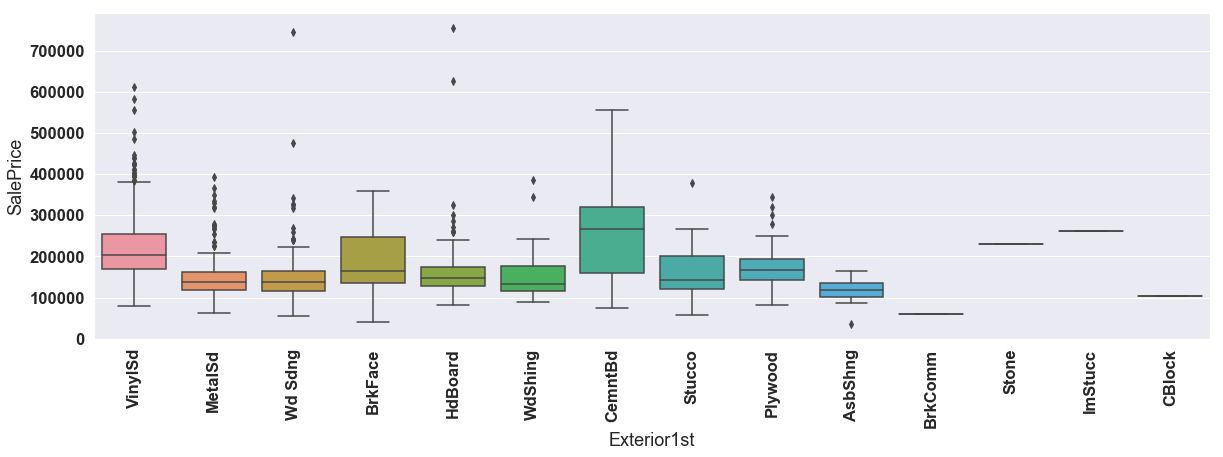

In [2028]:
plt.figure(figsize=(20, 6))
ax=sns.boxplot(x = 'Exterior1st', y = 'SalePrice', data = house_price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### Exterior2nd against SalePrice

In [2029]:
house_price.Exterior2nd.value_counts()

VinylSd    412
MetalSd    169
Wd Sdng    144
HdBoard    138
Plywood     82
CmentBd     45
Wd Shng     28
Stucco      19
BrkFace     18
AsbShng     15
ImStucc      9
Brk Cmn      6
Stone        2
AsphShn      2
Other        1
CBlock       1
Name: Exterior2nd, dtype: int64

[Text(0, 0, 'VinylSd'),
 Text(0, 0, 'MetalSd'),
 Text(0, 0, 'Wd Shng'),
 Text(0, 0, 'HdBoard'),
 Text(0, 0, 'Wd Sdng'),
 Text(0, 0, 'Plywood'),
 Text(0, 0, 'CmentBd'),
 Text(0, 0, 'BrkFace'),
 Text(0, 0, 'Stucco'),
 Text(0, 0, 'AsbShng'),
 Text(0, 0, 'Brk Cmn'),
 Text(0, 0, 'ImStucc'),
 Text(0, 0, 'AsphShn'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Stone'),
 Text(0, 0, 'CBlock')]

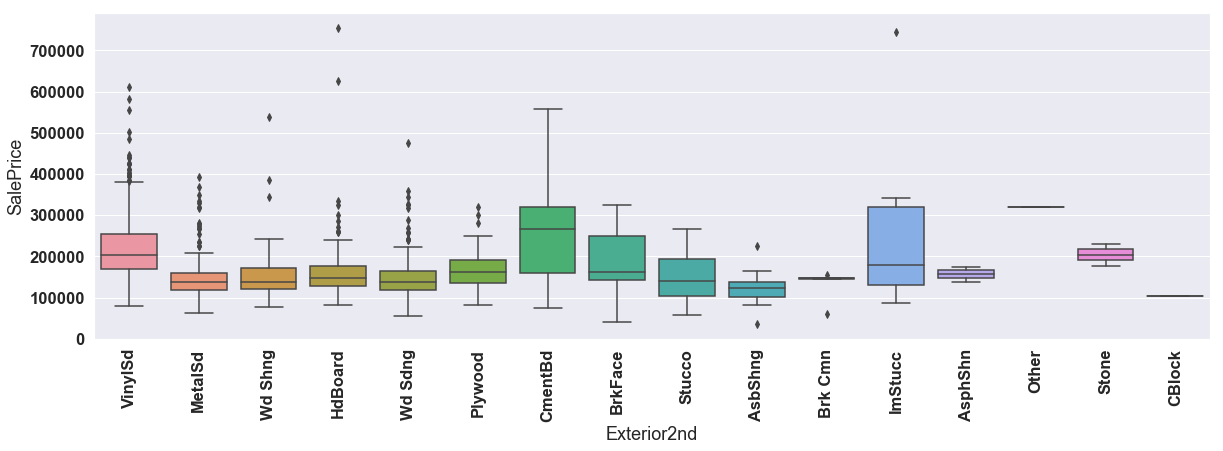

In [2030]:
plt.figure(figsize=(20, 6))
ax=sns.boxplot(x = 'Exterior2nd', y = 'SalePrice', data = house_price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### MasVnrType against SalePrice
Masonry veneer type

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

In [2031]:
house_price.MasVnrType.value_counts()

None       637
BrkFace    327
Stone      118
BrkCmn       9
Name: MasVnrType, dtype: int64

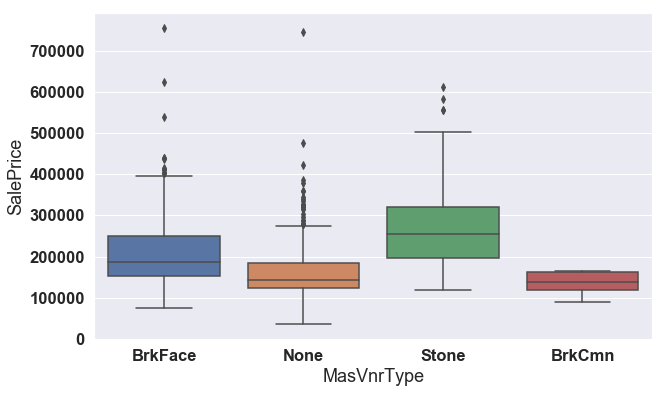

In [2032]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'MasVnrType', y = 'SalePrice', data = house_price)

#### MasVnrArea against SalePrice
Masonry veneer area in square feet

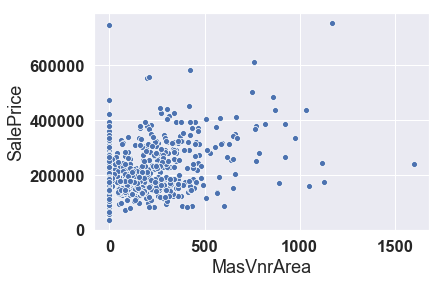

In [1696]:
sns.scatterplot(x='MasVnrArea', y='SalePrice', data=house_price)

Outlier check and removal for MasVnrArea

In [2033]:
# outlier treatment for MasVnrArea
house_price = house_price.loc[house_price.MasVnrArea < 1500]
#sns.set(font_scale = 1)
#plt.boxplot(house_price.MasVnrArea)
#Q1 = house_price.MasVnrArea.quantile(0.25)
#Q3 = house_price.MasVnrArea.quantile(0.75)
#IQR = Q3 - Q1
#house_price_MasVnrArea_outliers = house_price[(house_price.MasVnrArea < Q1 - 1.5*IQR) | (house_price.MasVnrArea > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.MasVnrArea >= Q1 - 1.5*IQR) & (house_price.MasVnrArea <= Q3 + 1.5*IQR)]

#### ExterQual against SalePrice
Evaluates the quality of the material on the exterior 
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [2034]:
house_price.ExterQual.value_counts()

TA    644
Gd    394
Ex     45
Fa      7
Name: ExterQual, dtype: int64

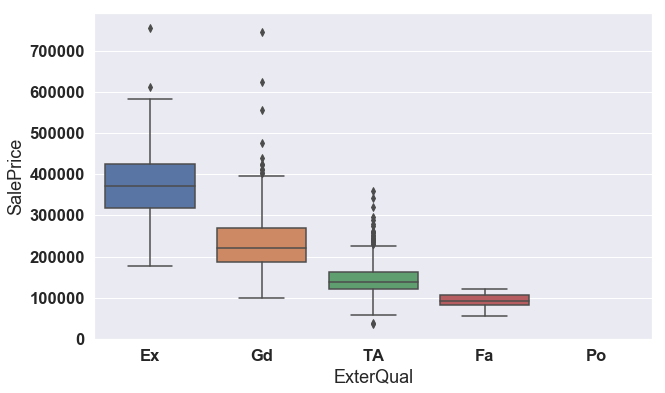

In [2035]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'ExterQual', y = 'SalePrice', data = house_price, order = ['Ex','Gd','TA','Fa','Po'])

#### ExterCond against SalePrice
Evaluates the present condition of the material on the exterior
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [2036]:
house_price.ExterCond.value_counts()

TA    969
Gd    104
Fa     15
Ex      2
Name: ExterCond, dtype: int64

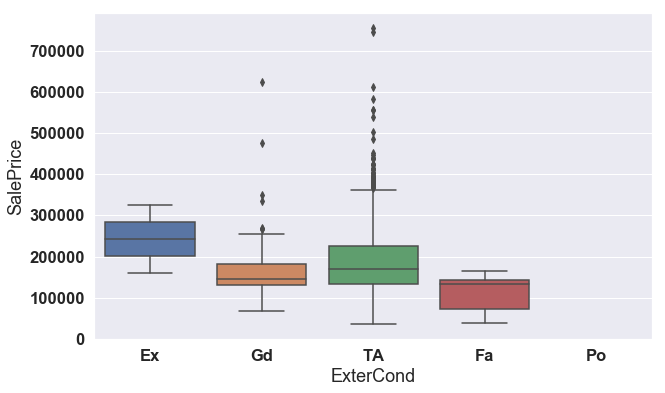

In [2037]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'ExterCond', y = 'SalePrice', data = house_price, order = ['Ex','Gd','TA','Fa','Po'])

#### Foundation against SalePrice
Type of foundation
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

In [2038]:
house_price.Foundation.value_counts()

PConc     516
CBlock    444
BrkTil    122
Stone       6
Wood        2
Name: Foundation, dtype: int64

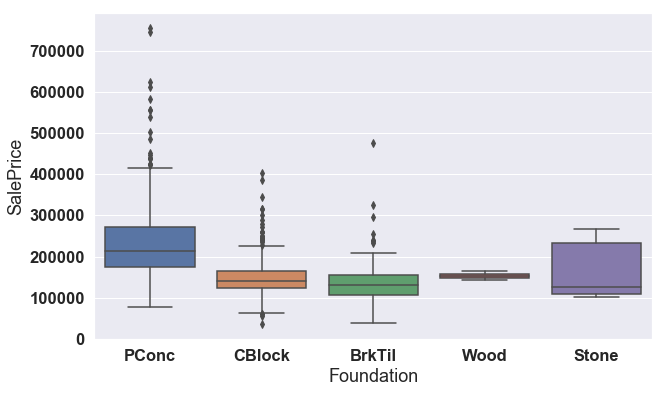

In [2039]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Foundation', y = 'SalePrice', data = house_price)

#### BsmtQual against SalePrice
Evaluates the height of the basement

       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches
       NA	No Basement

In [2040]:
house_price.BsmtQual.value_counts()

TA    486
Gd    460
Ex    112
Fa     32
Name: BsmtQual, dtype: int64

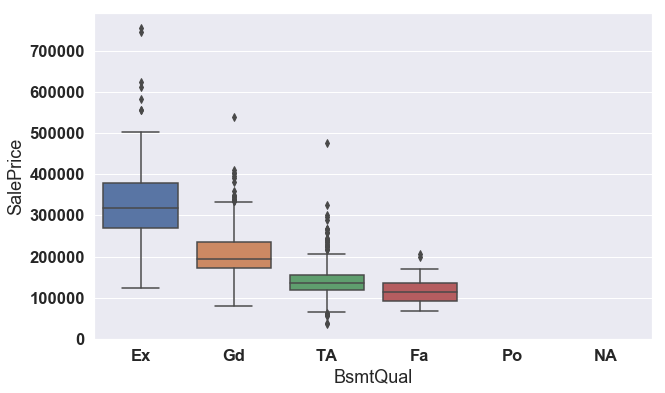

In [2041]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'BsmtQual', y = 'SalePrice', data = house_price, order = ['Ex','Gd','TA','Fa','Po','NA'])

#### BsmtCond against SalePrice

Evaluates the general condition of the basement

       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

In [2042]:
house_price.BsmtCond.value_counts()

TA    1002
Gd      51
Fa      36
Po       1
Name: BsmtCond, dtype: int64

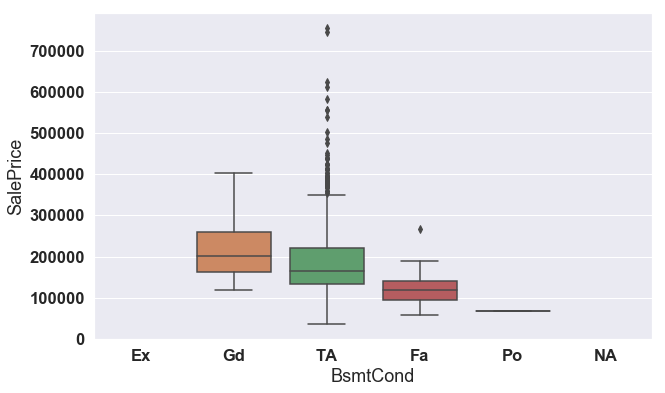

In [2043]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'BsmtCond', y = 'SalePrice', data = house_price, order = ['Ex','Gd','TA','Fa','Po','NA'])

#### BsmtExposure against SalePrice

Refers to walkout or garden level walls

       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

In [2044]:
house_price.BsmtExposure.value_counts()

No    733
Av    174
Gd     94
Mn     89
Name: BsmtExposure, dtype: int64

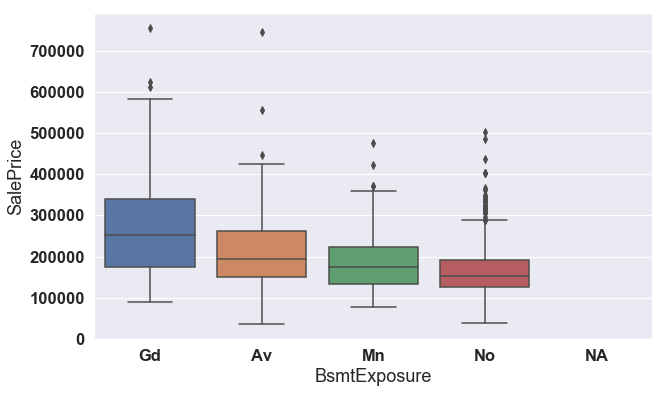

In [2045]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'BsmtExposure', y = 'SalePrice', data = house_price, order = ['Gd','Av','Mn','No','NA'])

#### BsmtFinType1 against SalePrice
Rating of basement finished area

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

In [2046]:
house_price.BsmtFinType1.value_counts()

Unf    343
GLQ    321
ALQ    161
Rec    105
BLQ    104
LwQ     56
Name: BsmtFinType1, dtype: int64

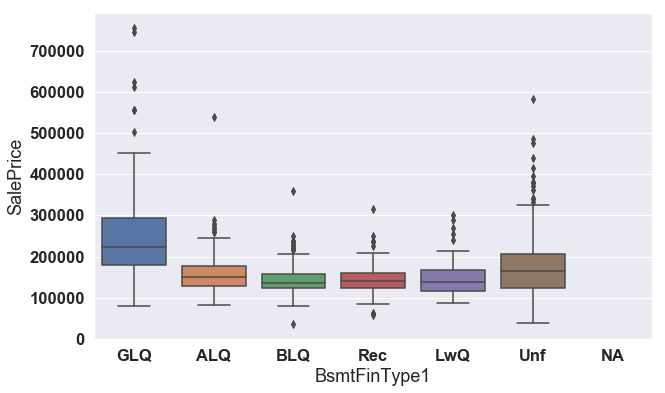

In [2047]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'BsmtFinType1', y = 'SalePrice', data = house_price, order = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'])

#### BsmtFinSF1 against SalePrice
Type 1 finished square feet

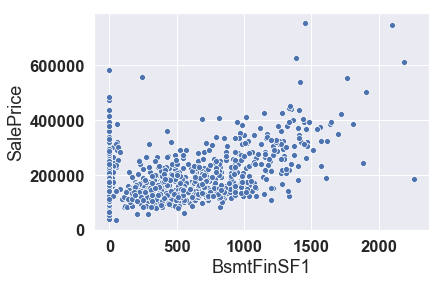

In [2048]:
sns.scatterplot(x='BsmtFinSF1', y='SalePrice', data=house_price)

Outlier check and removal for BsmtFinSF1

In [2049]:
# outlier treatment for BsmtFinSF1
house_price = house_price.loc[house_price.BsmtFinSF1 < 1750]
#sns.set(font_scale = 1)
#plt.boxplot(house_price.BsmtFinSF1)
#Q1 = house_price.BsmtFinSF1.quantile(0.25)
#Q3 = house_price.BsmtFinSF1.quantile(0.75)
#IQR = Q3 - Q1
#house_price_BsmtFinSF1_outliers = house_price[(house_price.BsmtFinSF1 < Q1 - 1.5*IQR) | (house_price.BsmtFinSF1 > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.BsmtFinSF1 >= Q1 - 1.5*IQR) & (house_price.BsmtFinSF1 <= Q3 + 1.5*IQR)]

#### BsmtFinType2 against SalePrice
Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basemen

In [2050]:
house_price.BsmtFinType2.value_counts()

Unf    963
Rec     36
LwQ     35
BLQ     25
ALQ     12
GLQ     12
Name: BsmtFinType2, dtype: int64

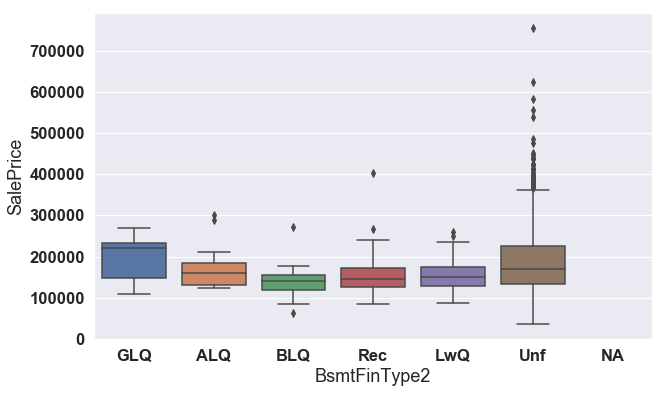

In [2051]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'BsmtFinType2', y = 'SalePrice', data = house_price, order = ['GLQ','ALQ','BLQ','Rec','LwQ','Unf','NA'])

#### BsmtFinSF2 against SalePrice
Type 2 finished square feet

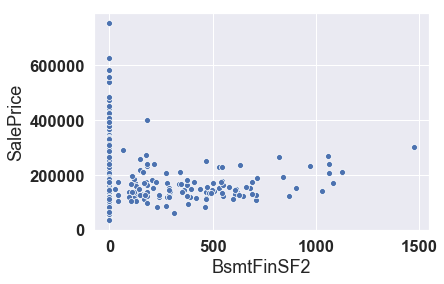

In [2052]:
sns.scatterplot(x='BsmtFinSF2', y='SalePrice', data=house_price)

****************************Outlier check and removal for BsmtFinSF2

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb0663bf98>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb066446d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb0663bb70>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb06644dd8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb06644ef0>],
 'means': []}

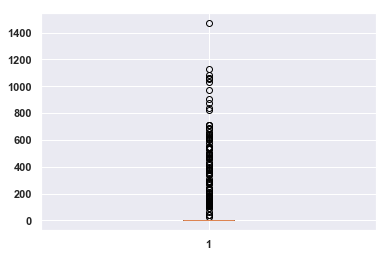

In [2053]:
# outlier treatment for BsmtFinSF2
sns.set(font_scale = 1)
plt.boxplot(house_price.BsmtFinSF2)
#Q1 = house_price.BsmtFinSF2.quantile(0.25)
#Q3 = house_price.BsmtFinSF2.quantile(0.75)
#IQR = Q3 - Q1
#house_price_BsmtFinSF2_outliers = house_price[(house_price.BsmtFinSF2 < Q1 - 1.5*IQR) | (house_price.BsmtFinSF2 > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.BsmtFinSF2 >= Q1 - 1.5*IQR) & (house_price.BsmtFinSF2 <= Q3 + 1.5*IQR)]

Here since a bulk of data is havig 0 value and not much variability, we will drop this column instead of removing outliers and thus relevant data.

In [2054]:
house_price.drop('BsmtFinSF2',axis=1,inplace=True)

#### BsmtUnfSF against SalePrice
Unfinished square feet of basement area

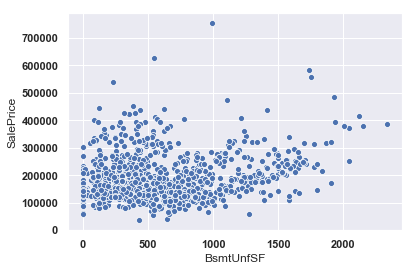

In [2055]:
sns.scatterplot(x='BsmtUnfSF', y='SalePrice', data=house_price)

Outlier check and removal for BsmtUnfSF

In [2056]:
# outlier treatment for BsmtUnfSF
house_price = house_price.loc[house_price.BsmtUnfSF < 2000]
#sns.set(font_scale = 1)
#plt.boxplot(house_price.BsmtUnfSF)
#Q1 = house_price.BsmtUnfSF.quantile(0.25)
#Q3 = house_price.BsmtUnfSF.quantile(0.75)
#IQR = Q3 - Q1
#house_price_BsmtUnfSF_outliers = house_price[(house_price.BsmtUnfSF < Q1 - 1.5*IQR) | (house_price.BsmtUnfSF > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.BsmtUnfSF >= Q1 - 1.5*IQR) & (house_price.BsmtUnfSF <= Q3 + 1.5*IQR)]

#### TotalBsmtSF against SalePrice
Total square feet of basement area

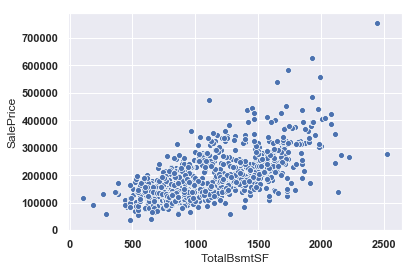

In [2057]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=house_price)

Outlier check and removal for TotalBsmtSF

In [2058]:
# outlier treatment for TotalBsmtSF
house_price = house_price.loc[house_price.TotalBsmtSF < 2500]
#sns.set(font_scale = 1)
#plt.boxplot(house_price.TotalBsmtSF)
#Q1 = house_price.TotalBsmtSF.quantile(0.25)
#Q3 = house_price.TotalBsmtSF.quantile(0.75)
#IQR = Q3 - Q1
#house_price_TotalBsmtSF_outliers = house_price[(house_price.TotalBsmtSF < Q1 - 1.5*IQR) | (house_price.TotalBsmtSF > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.TotalBsmtSF >= Q1 - 1.5*IQR) & (house_price.TotalBsmtSF <= Q3 + 1.5*IQR)]

#### Heating against SalePrice
Type of heating
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace

In [2059]:
house_price.Heating.value_counts()

GasA    1058
GasW      15
Grav       2
OthW       1
Name: Heating, dtype: int64

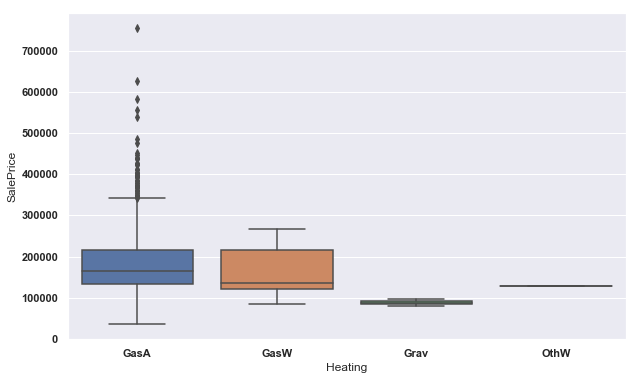

In [2060]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Heating', y = 'SalePrice', data = house_price)

#### HeatingQC against SalePrice
Heating quality and condition

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

In [2061]:
house_price.HeatingQC.value_counts()

Ex    579
TA    296
Gd    173
Fa     27
Po      1
Name: HeatingQC, dtype: int64

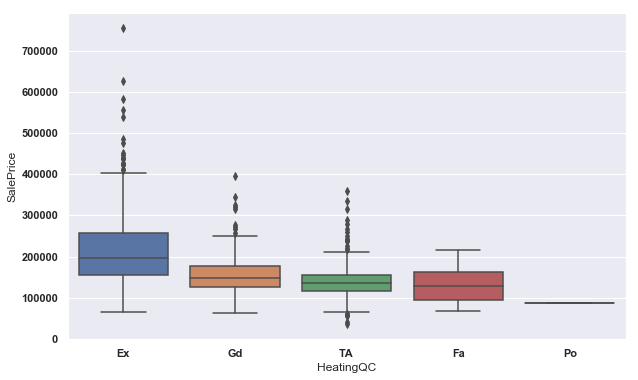

In [2062]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'HeatingQC', y = 'SalePrice', data = house_price, order = ['Ex','Gd','TA','Fa','Po'])

#### CentralAir against SalePrice
Central air conditioning

       N	No
       Y	Yes

In [2063]:
house_price.CentralAir.value_counts()

Y    1018
N      58
Name: CentralAir, dtype: int64

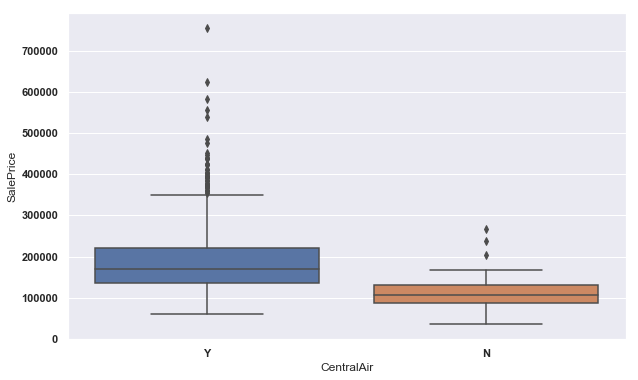

In [2064]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'CentralAir', y = 'SalePrice', data = house_price)

#### Electrical against SalePrice
Electrical system

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

In [2065]:
house_price.Electrical.value_counts()

SBrkr    991
FuseA     67
FuseF     15
FuseP      2
Mix        1
Name: Electrical, dtype: int64

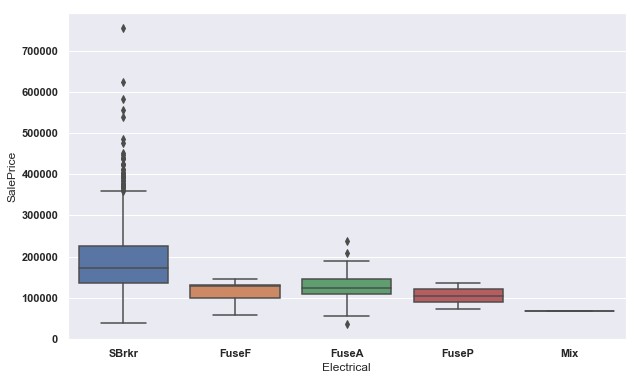

In [2066]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Electrical', y = 'SalePrice', data = house_price)

#### 1stFlrSF against SalePrice
First Floor square feet

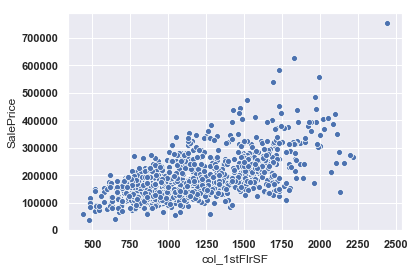

In [2067]:
house_price.rename(columns = {"1stFlrSF": "col_1stFlrSF"}, inplace = True)
sns.scatterplot(x='col_1stFlrSF', y='SalePrice', data=house_price)

Outlier check and removal for 1stFlrSF

In [2068]:
# outlier treatment for 1stFlrSF
house_price = house_price.loc[house_price.BsmtUnfSF < 2250]
#sns.set(font_scale = 1)
#plt.boxplot(house_price.col_1stFlrSF)
#Q1 = house_price.col_1stFlrSF.quantile(0.25)
#Q3 = house_price.col_1stFlrSF.quantile(0.75)
#IQR = Q3 - Q1
#house_price_col_1stFlrSF_outliers = house_price[(house_price.col_1stFlrSF < Q1 - 1.5*IQR) | (house_price.col_1stFlrSF > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.col_1stFlrSF >= Q1 - 1.5*IQR) & (house_price.col_1stFlrSF <= Q3 + 1.5*IQR)]

#### 2ndFlrSF against SalePrice
Second floor square feet

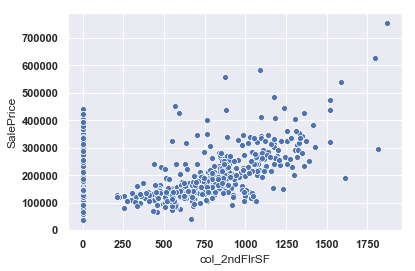

In [2069]:
house_price.rename(columns = {"2ndFlrSF": "col_2ndFlrSF"}, inplace = True)
sns.scatterplot(x='col_2ndFlrSF', y='SalePrice', data=house_price)

Outlier check and removal for 2ndFlrSF

In [2070]:
# outlier treatment for 2ndFlrSF

house_price = house_price.loc[house_price.col_2ndFlrSF < 1750]
#sns.set(font_scale = 1)
#plt.boxplot(house_price.col_2ndFlrSF)
#Q1 = house_price.col_2ndFlrSF.quantile(0.25)
#Q3 = house_price.col_2ndFlrSF.quantile(0.75)
#IQR = Q3 - Q1
#house_price_col_2ndFlrSF_outliers = house_price[(house_price.col_2ndFlrSF < Q1 - 1.5*IQR) | (house_price.col_2ndFlrSF > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.col_2ndFlrSF >= Q1 - 1.5*IQR) & (house_price.col_2ndFlrSF <= Q3 + 1.5*IQR)]

#### LowQualFinSF against SalePrice
Low quality finished square feet (all floors)

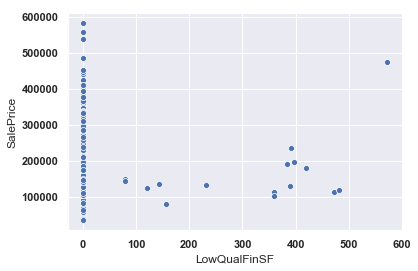

In [2071]:
sns.scatterplot(x='LowQualFinSF', y='SalePrice', data=house_price)

Outlier check and removal for LowQualFinSF

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb07d71c18>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb07d79358>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb07d717f0>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb07d79a58>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb07d79dd8>],
 'means': []}

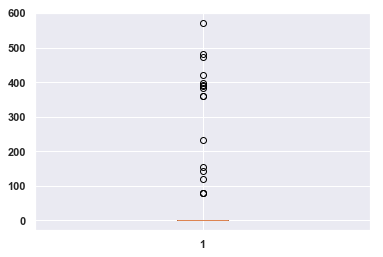

In [2072]:
# outlier treatment for LowQualFinSF

sns.set(font_scale = 1)
plt.boxplot(house_price.LowQualFinSF)
#Q1 = house_price.LowQualFinSF.quantile(0.25)
#Q3 = house_price.LowQualFinSF.quantile(0.75)
#IQR = Q3 - Q1
#house_price_LowQualFinSF_outliers = house_price[(house_price.LowQualFinSF < Q1 - 1.5*IQR) | (house_price.LowQualFinSF > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.LowQualFinSF >= Q1 - 1.5*IQR) & (house_price.LowQualFinSF <= Q3 + 1.5*IQR)]

Here as well since the column is having most of the values 0, not much variability i its values, and hence dropping the column.

In [2073]:
house_price.drop('LowQualFinSF',axis=1,inplace=True)

#### GrLivArea against SalePrice
Above grade (ground) living area square feet

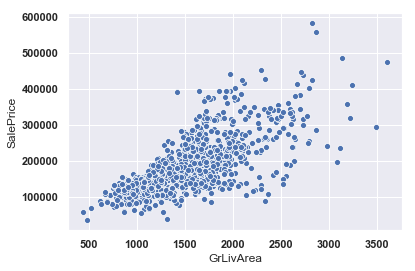

In [1735]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=house_price)

Outlier check and removal for GrLivArea

In [2074]:
# outlier treatment for GrLivArea

house_price = house_price.loc[house_price.GrLivArea < 3500]
#sns.set(font_scale = 1)
#plt.boxplot(house_price.GrLivArea)
#Q1 = house_price.GrLivArea.quantile(0.25)
#Q3 = house_price.GrLivArea.quantile(0.75)
#IQR = Q3 - Q1
#house_price_GrLivArea_outliers = house_price[(house_price.GrLivArea < Q1 - 1.5*IQR) | (house_price.GrLivArea > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.GrLivArea >= Q1 - 1.5*IQR) & (house_price.GrLivArea <= Q3 + 1.5*IQR)]

#### BsmtFullBath against SalePrice
Basement full bathrooms

In [2075]:
house_price.BsmtFullBath.value_counts()

0    632
1    432
2      8
Name: BsmtFullBath, dtype: int64

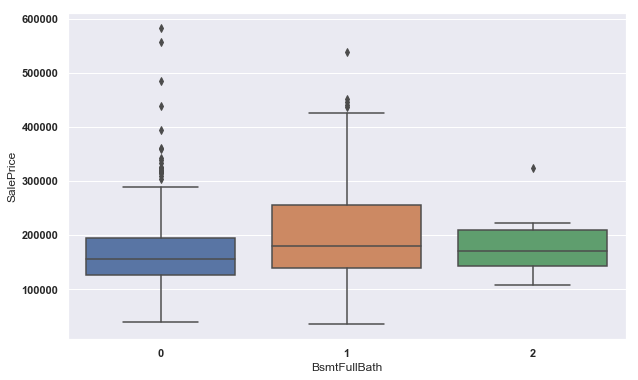

In [2076]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'BsmtFullBath', y = 'SalePrice', data = house_price)

#### BsmtHalfBath against SalePrice
Basement half bathrooms

In [2077]:
house_price.BsmtHalfBath.value_counts()

0    1012
1      59
2       1
Name: BsmtHalfBath, dtype: int64

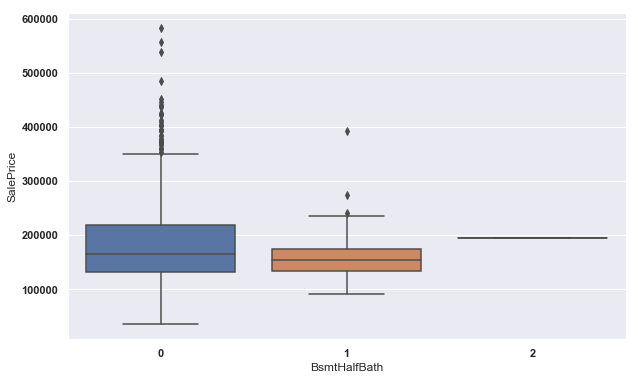

In [2078]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'BsmtHalfBath', y = 'SalePrice', data = house_price)

#### FullBath against SalePrice
Full bathrooms above grade

In [2079]:
house_price.FullBath.value_counts()

2    570
1    476
3     21
0      5
Name: FullBath, dtype: int64

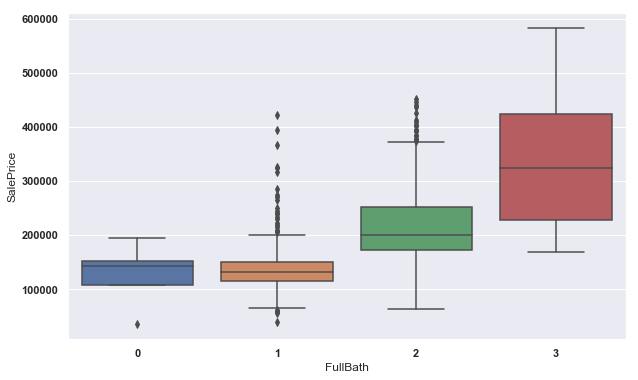

In [2080]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'FullBath', y = 'SalePrice', data = house_price)

#### HalfBath against SalePrice
Half baths above grade

In [2081]:
house_price.HalfBath.value_counts()

0    667
1    398
2      7
Name: HalfBath, dtype: int64

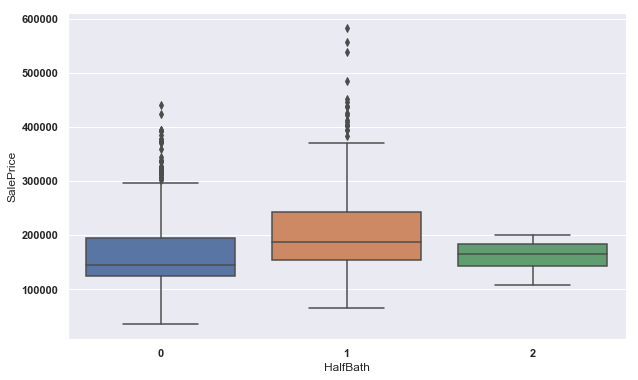

In [2082]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'HalfBath', y = 'SalePrice', data = house_price)

#### BedroomAbvGr against SalePrice
Bedrooms above grade (does NOT include basement bedrooms)

In [2083]:
house_price.BedroomAbvGr.value_counts()

3    605
2    272
4    148
1     27
5     14
6      3
0      3
Name: BedroomAbvGr, dtype: int64

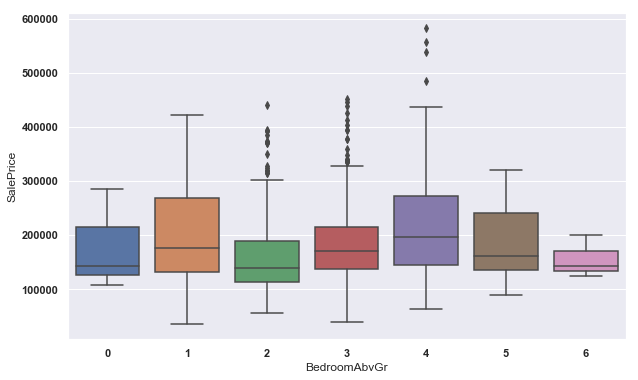

In [2084]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'BedroomAbvGr', y = 'SalePrice', data = house_price)

#### KitchenAbvGr against SalePrice
Kitchens above grade

In [2085]:
house_price.KitchenAbvGr.value_counts()

1    1036
2      35
3       1
Name: KitchenAbvGr, dtype: int64

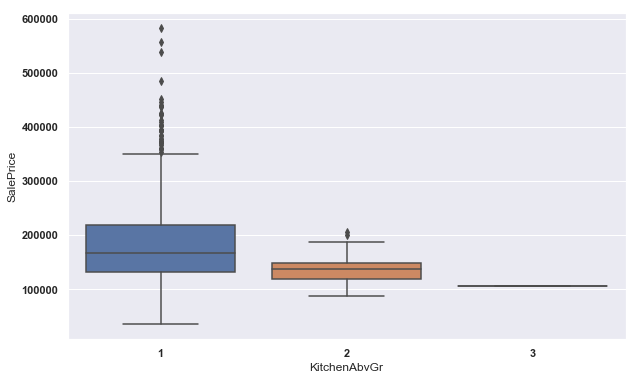

In [2086]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'KitchenAbvGr', y = 'SalePrice', data = house_price)

#### KitchenQual against SalePrice
Kitchen quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

In [2087]:
house_price.KitchenQual.value_counts()

TA    526
Gd    447
Ex     78
Fa     21
Name: KitchenQual, dtype: int64

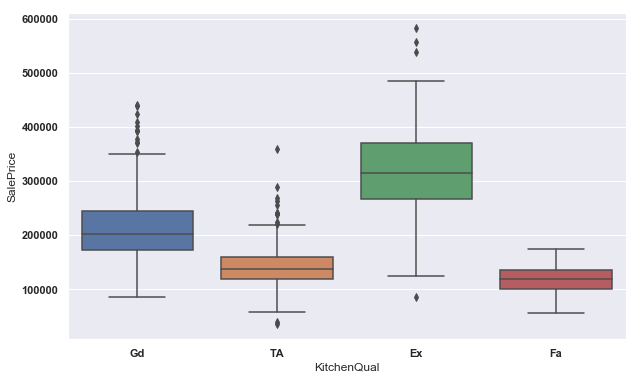

In [2088]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'KitchenQual', y = 'SalePrice', data = house_price)

#### TotRmsAbvGrd against SalePrice
Total rooms above grade (does not include bathrooms)

In [2089]:
house_price.TotRmsAbvGrd.value_counts()

6     317
7     236
5     207
8     143
4      60
9      52
10     31
11     13
3       7
12      6
Name: TotRmsAbvGrd, dtype: int64

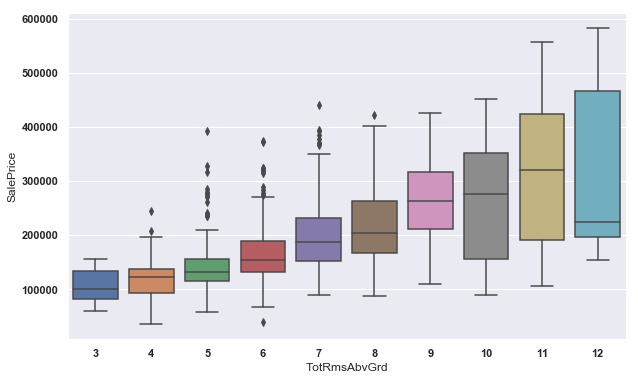

In [2090]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'TotRmsAbvGrd', y = 'SalePrice', data = house_price)

#### Functional against SalePrice
Home functionality (Assume typical unless deductions are warranted)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

In [2091]:
house_price.Functional.value_counts()

Typ     1002
Min2      25
Min1      21
Maj1      10
Mod       10
Maj2       4
Name: Functional, dtype: int64

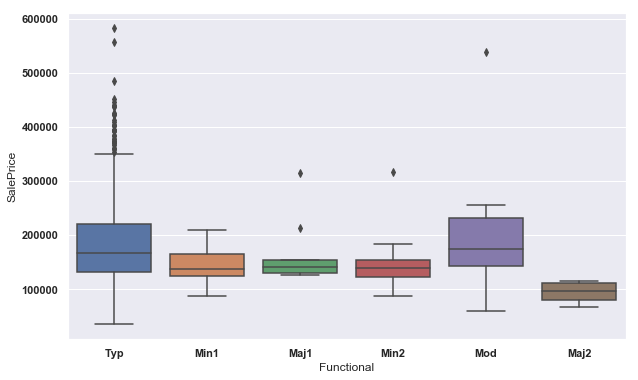

In [2092]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Functional', y = 'SalePrice', data = house_price)

#### Fireplaces against SalePrice
Number of fireplaces

In [2093]:
house_price.Fireplaces.value_counts()

0    511
1    488
2     70
3      3
Name: Fireplaces, dtype: int64

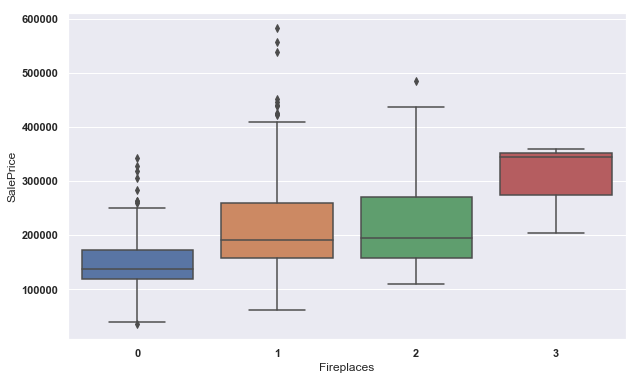

In [2094]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'Fireplaces', y = 'SalePrice', data = house_price)

#### GarageType against SalePrice
Garage location
		
       2Types	More than one type of garage
       Attchd	Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	Detached from home
       NA	No Garage

In [2095]:
house_price.GarageType.value_counts()

Attchd     662
Detchd     323
BuiltIn     61
Basment     15
CarPort      6
2Types       5
Name: GarageType, dtype: int64

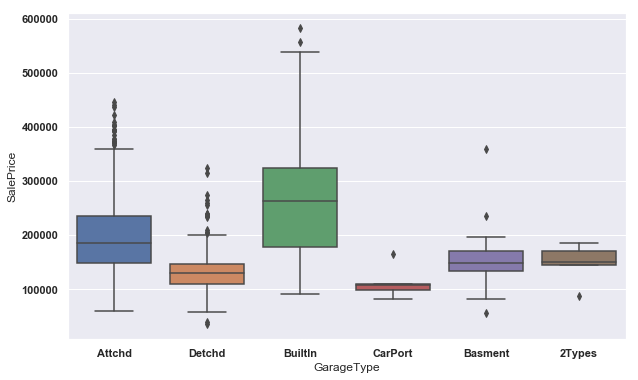

In [2096]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'GarageType', y = 'SalePrice', data = house_price)

#### GarageYrBlt against SalePrice
Year garage was built

In [2097]:
house_price.GarageYrBlt.value_counts()

2005.0    65
2006.0    57
2004.0    46
2007.0    42
2003.0    38
1998.0    26
2008.0    26
1999.0    25
1977.0    21
1950.0    20
1968.0    19
1958.0    18
1976.0    18
1974.0    17
1996.0    17
1962.0    16
1954.0    16
1957.0    16
2009.0    16
1959.0    15
1964.0    15
1997.0    15
1965.0    15
1993.0    14
2000.0    14
1994.0    13
2002.0    13
1980.0    13
1920.0    13
1990.0    13
          ..
1916.0     4
1936.0     4
1928.0     4
1983.0     4
1935.0     4
1931.0     3
1932.0     3
2010.0     3
1910.0     3
1923.0     3
1945.0     3
1946.0     3
1952.0     3
1924.0     3
1921.0     3
1938.0     3
1915.0     2
1914.0     2
1937.0     2
1982.0     2
1929.0     2
1918.0     2
1947.0     2
1933.0     1
1908.0     1
1906.0     1
1900.0     1
1927.0     1
1942.0     1
1934.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

[Text(0, 0, '1900.0'),
 Text(0, 0, '1906.0'),
 Text(0, 0, '1908.0'),
 Text(0, 0, '1910.0'),
 Text(0, 0, '1914.0'),
 Text(0, 0, '1915.0'),
 Text(0, 0, '1916.0'),
 Text(0, 0, '1918.0'),
 Text(0, 0, '1920.0'),
 Text(0, 0, '1921.0'),
 Text(0, 0, '1922.0'),
 Text(0, 0, '1923.0'),
 Text(0, 0, '1924.0'),
 Text(0, 0, '1925.0'),
 Text(0, 0, '1926.0'),
 Text(0, 0, '1927.0'),
 Text(0, 0, '1928.0'),
 Text(0, 0, '1929.0'),
 Text(0, 0, '1930.0'),
 Text(0, 0, '1931.0'),
 Text(0, 0, '1932.0'),
 Text(0, 0, '1933.0'),
 Text(0, 0, '1934.0'),
 Text(0, 0, '1935.0'),
 Text(0, 0, '1936.0'),
 Text(0, 0, '1937.0'),
 Text(0, 0, '1938.0'),
 Text(0, 0, '1939.0'),
 Text(0, 0, '1940.0'),
 Text(0, 0, '1941.0'),
 Text(0, 0, '1942.0'),
 Text(0, 0, '1945.0'),
 Text(0, 0, '1946.0'),
 Text(0, 0, '1947.0'),
 Text(0, 0, '1948.0'),
 Text(0, 0, '1949.0'),
 Text(0, 0, '1950.0'),
 Text(0, 0, '1951.0'),
 Text(0, 0, '1952.0'),
 Text(0, 0, '1953.0'),
 Text(0, 0, '1954.0'),
 Text(0, 0, '1955.0'),
 Text(0, 0, '1956.0'),
 Text(0, 0,

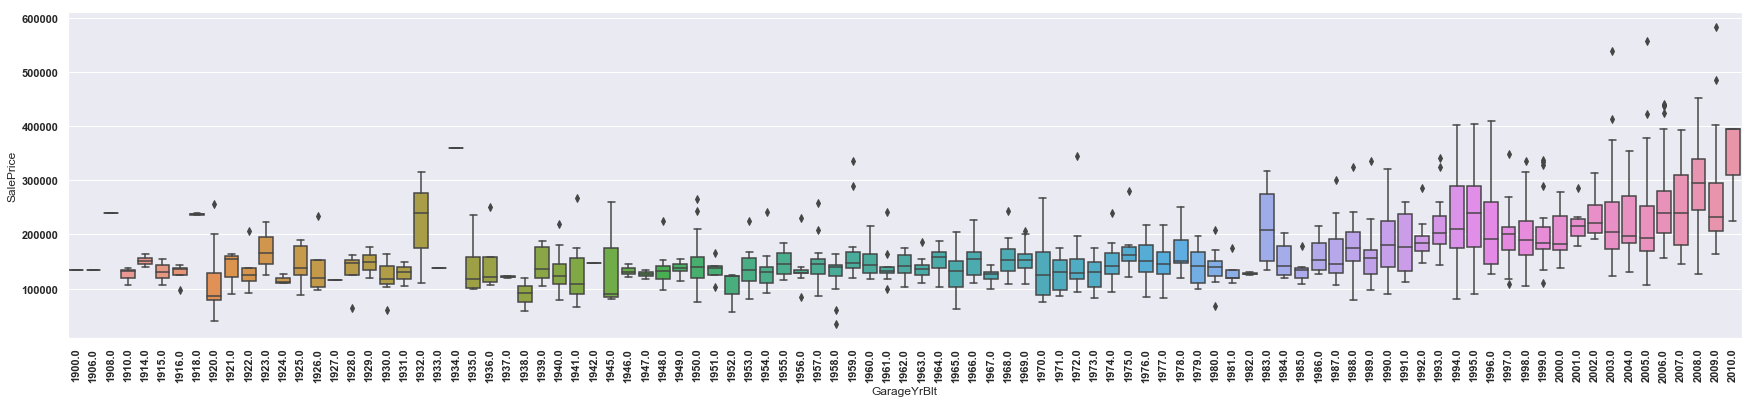

In [2098]:
plt.figure(figsize=(30, 6))
ax = sns.boxplot(x = 'GarageYrBlt', y = 'SalePrice', data = house_price)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

#### GarageFinish against SalePrice
Interior finish of the garage

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage

In [2099]:
house_price.GarageFinish.value_counts()

Unf    483
RFn    329
Fin    260
Name: GarageFinish, dtype: int64

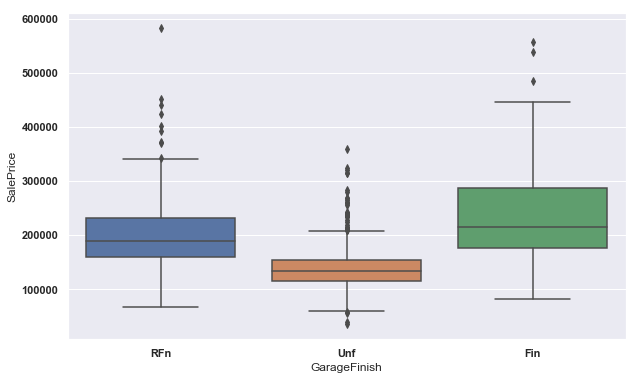

In [2100]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'GarageFinish', y = 'SalePrice', data = house_price)

#### GarageCars against SalePrice
Size of garage in car capacity

In [2101]:
house_price.GarageCars.value_counts()

2    610
1    307
3    151
4      4
Name: GarageCars, dtype: int64

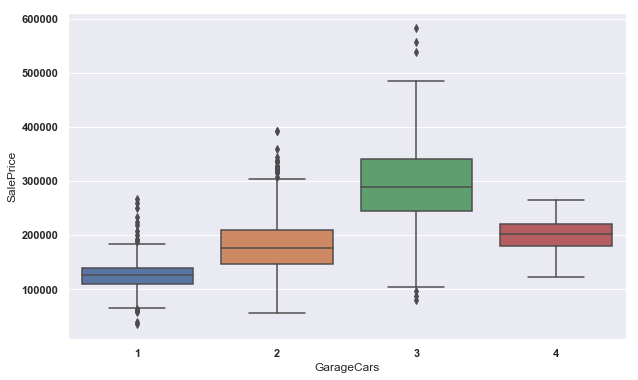

In [2102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'GarageCars', y = 'SalePrice', data = house_price)

#### GarageArea against SalePrice
Size of garage in square feet

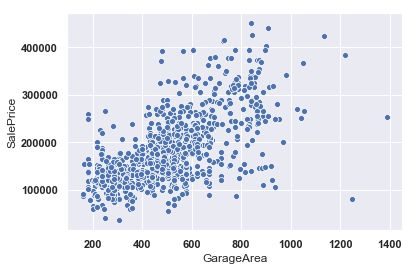

In [1765]:
sns.scatterplot(x='GarageArea', y='SalePrice', data=house_price)

Outlier check and removal for GarageArea

In [2103]:
# outlier treatment for GarageArea
house_price = house_price.loc[house_price.GarageArea < 1200]
#sns.set(font_scale = 1)
#plt.boxplot(house_price.GarageArea)
#Q1 = house_price.GarageArea.quantile(0.25)
#Q3 = house_price.GarageArea.quantile(0.75)
#IQR = Q3 - Q1
#house_price_GarageArea_outliers = house_price[(house_price.GarageArea < Q1 - 1.5*IQR) | (house_price.GarageArea > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.GarageArea >= Q1 - 1.5*IQR) & (house_price.GarageArea <= Q3 + 1.5*IQR)]

#### GarageQual against SalePrice
Garage quality

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [2104]:
house_price.GarageQual.value_counts()

TA    1008
Fa      46
Gd      11
Po       3
Ex       2
Name: GarageQual, dtype: int64

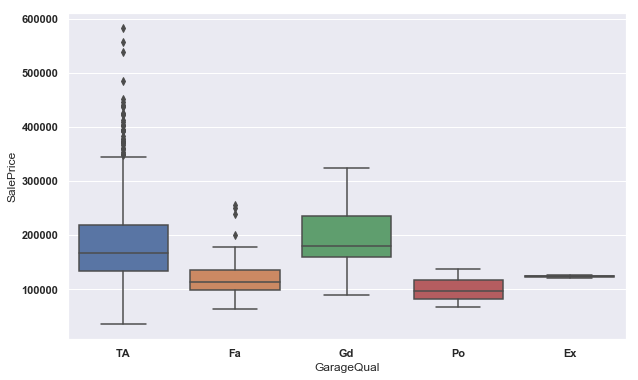

In [2105]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'GarageQual', y = 'SalePrice', data = house_price)

#### GarageCond against SalePrice
Garage condition

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

In [2106]:
house_price.GarageCond.value_counts()

TA    1026
Fa      31
Po       6
Gd       5
Ex       2
Name: GarageCond, dtype: int64

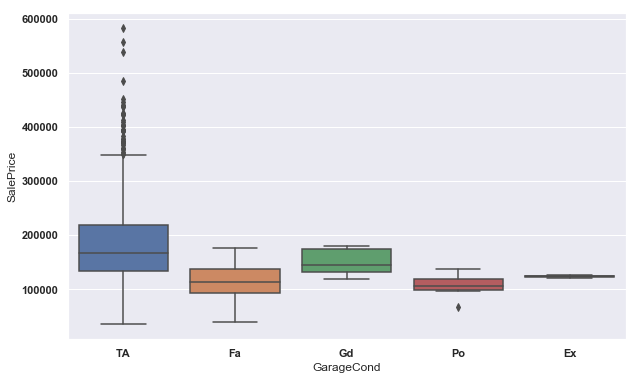

In [2107]:

plt.figure(figsize=(10, 6))
sns.boxplot(x = 'GarageCond', y = 'SalePrice', data = house_price)

#### PavedDrive against SalePrice
Paved driveway

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

In [2108]:
house_price.PavedDrive.value_counts()

Y    999
N     48
P     23
Name: PavedDrive, dtype: int64

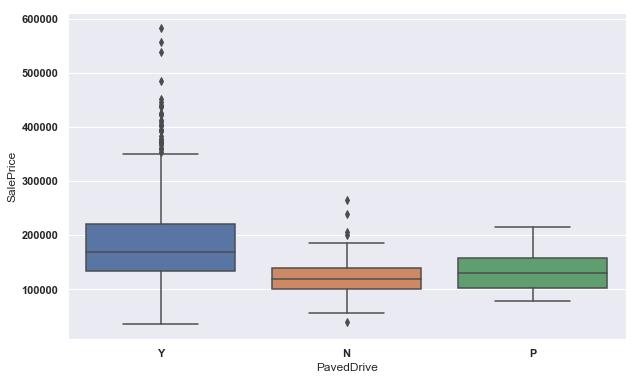

In [2109]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'PavedDrive', y = 'SalePrice', data = house_price)

#### WoodDeckSF against SalePrice
Wood deck area in square feet

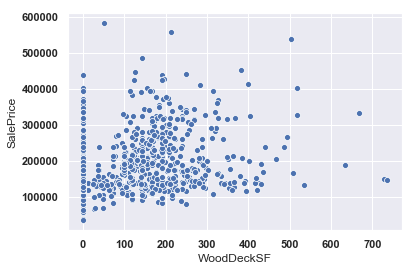

In [2110]:
sns.scatterplot(x='WoodDeckSF', y='SalePrice', data=house_price)

Outlier check and removal for WoodDeckSF

In [2111]:
# outlier treatment for WoodDeckSF
house_price = house_price.loc[house_price.WoodDeckSF < 600]
#sns.set(font_scale = 1)
#plt.boxplot(house_price.WoodDeckSF)
#Q1 = house_price.WoodDeckSF.quantile(0.25)
#Q3 = house_price.WoodDeckSF.quantile(0.75)
#IQR = Q3 - Q1
#house_price_WoodDeckSF_outliers = house_price[(house_price.WoodDeckSF < Q1 - 1.5*IQR) | (house_price.WoodDeckSF > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.WoodDeckSF >= Q1 - 1.5*IQR) & (house_price.WoodDeckSF <= Q3 + 1.5*IQR)]

#### OpenPorchSF against SalePrice
Open porch area in square feet

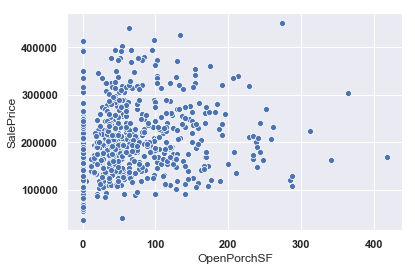

In [1775]:
sns.scatterplot(x='OpenPorchSF', y='SalePrice', data=house_price)

Outlier check and removal for OpenPorchSF

In [2112]:
# outlier treatment for OpenPorchSF
house_price = house_price.loc[house_price.OpenPorchSF < 300]
#sns.set(font_scale = 1)
#plt.boxplot(house_price.OpenPorchSF)
#Q1 = house_price.OpenPorchSF.quantile(0.25)
#Q3 = house_price.OpenPorchSF.quantile(0.75)
#IQR = Q3 - Q1
#house_price_OpenPorchSF_outliers = house_price[(house_price.OpenPorchSF < Q1 - 1.5*IQR) | (house_price.OpenPorchSF > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.OpenPorchSF >= Q1 - 1.5*IQR) & (house_price.OpenPorchSF <= Q3 + 1.5*IQR)]

In [2113]:
house_price.OpenPorchSF.value_counts()

0      466
36      24
45      15
20      14
48      14
39      13
40      13
30      12
24      12
60      11
35      11
50      11
28      11
54      10
44      10
64       8
38       8
72       8
63       8
66       8
16       8
75       7
102      7
120      7
33       7
98       6
56       6
100      6
42       6
70       6
      ... 
285      1
175      1
174      1
160      1
117      1
83       1
85       1
86       1
91       1
92       1
93       1
94       1
95       1
287      1
106      1
111      1
122      1
159      1
123      1
125      1
129      1
131      1
133      1
134      1
135      1
141      1
148      1
151      1
156      1
101      1
Name: OpenPorchSF, Length: 165, dtype: int64

#### EnclosedPorch against SalePrice
Enclosed porch area in square feet

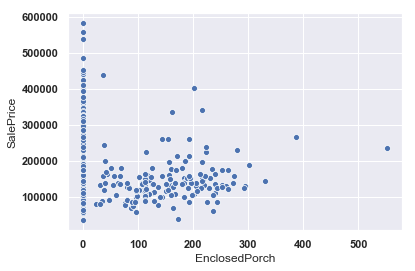

In [2114]:
sns.scatterplot(x='EnclosedPorch', y='SalePrice', data=house_price)

Outlier check and removal for EnclosedPorch

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb09d51780>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb09d51e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb09d51358>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb09d585c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb09d58940>],
 'means': []}

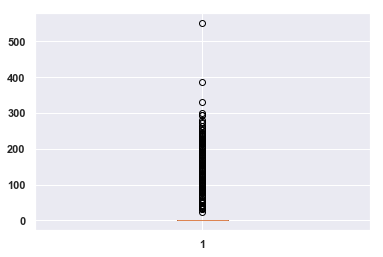

In [2115]:
# outlier treatment for EnclosedPorch
sns.set(font_scale = 1)
plt.boxplot(house_price.EnclosedPorch)
#Q1 = house_price.EnclosedPorch.quantile(0.25)
#3 = house_price.EnclosedPorch.quantile(0.75)
#IQR = Q3 - Q1
#house_price_EnclosedPorch_outliers = house_price[(house_price.EnclosedPorch < Q1 - 1.5*IQR) | (house_price.EnclosedPorch > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.EnclosedPorch >= Q1 - 1.5*IQR) & (house_price.EnclosedPorch <= Q3 + 1.5*IQR)]

Since most values are 0, we will drop this column

In [2116]:
house_price.drop('EnclosedPorch',axis=1,inplace=True)

#### 3SsnPorch against SalePrice
Three season porch area in square feet

In [2117]:
house_price.rename(columns = {"3SsnPorch": "col_3SsnPorch"}, inplace = True)

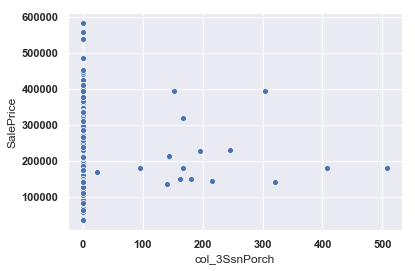

In [2118]:
sns.scatterplot(x='col_3SsnPorch', y='SalePrice', data=house_price)

Outlier check and removal for col_3SsnPorch

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb0986a780>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb098d0588>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb0986a668>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb09f282e8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb099bc0b8>],
 'means': []}

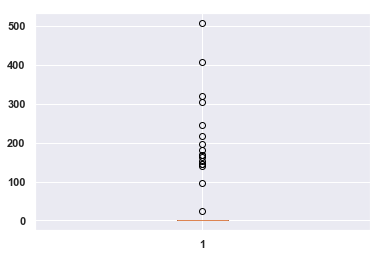

In [2119]:
# outlier treatment for col_3SsnPorch
sns.set(font_scale = 1)
plt.boxplot(house_price.col_3SsnPorch)
#Q1 = house_price.col_3SsnPorch.quantile(0.25)
#Q3 = house_price.col_3SsnPorch.quantile(0.75)
#IQR = Q3 - Q1
#house_price_col_3SsnPorch_outliers = house_price[(house_price.col_3SsnPorch < Q1 - 1.5*IQR) | (house_price.col_3SsnPorch > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.col_3SsnPorch >= Q1 - 1.5*IQR) & (house_price.col_3SsnPorch <= Q3 + 1.5*IQR)]

Since most values are zero, we will drop this column.

In [2120]:
house_price.drop('col_3SsnPorch',axis=1,inplace=True)

#### ScreenPorch against SalePrice
Screen porch area in square feet

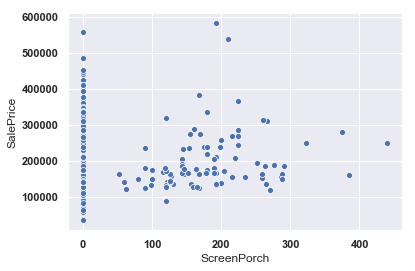

In [2121]:
sns.scatterplot(x='ScreenPorch', y='SalePrice', data=house_price)

Outlier check and removal for ScreenPorch

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb0b2b0fd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb0b2b8710>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb0b2b0ba8>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb0b2b8e10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb0b2b8f28>],
 'means': []}

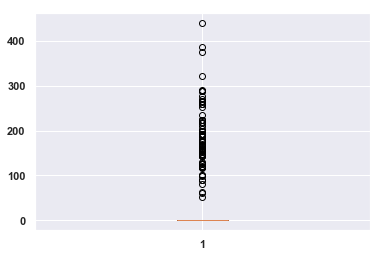

In [2122]:
# outlier treatment for ScreenPorch
sns.set(font_scale = 1)
plt.boxplot(house_price.ScreenPorch)
#Q1 = house_price.ScreenPorch.quantile(0.25)
#Q3 = house_price.ScreenPorch.quantile(0.75)
#IQR = Q3 - Q1
#house_price_ScreenPorch_outliers = house_price[(house_price.ScreenPorch < Q1 - 1.5*IQR) | (house_price.ScreenPorch > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.ScreenPorch >= Q1 - 1.5*IQR) & (house_price.ScreenPorch <= Q3 + 1.5*IQR)]

Since most of the column values are zero and not much variability in data, we will drop this column.

In [2123]:
house_price.drop('ScreenPorch',axis=1,inplace=True)

#### PoolArea against SalePrice
Pool area in square feet

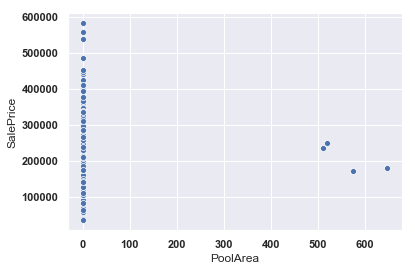

In [2124]:
sns.scatterplot(x='PoolArea', y='SalePrice', data=house_price)

Outlier check and removal for PoolArea

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb0b35fb70>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb0b3692b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb0b35f748>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb0b3699b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb0b369d30>],
 'means': []}

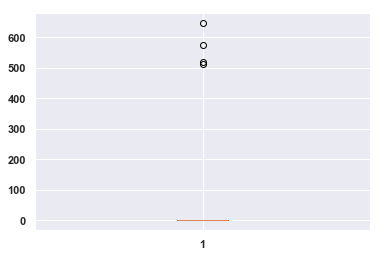

In [2125]:
# outlier treatment for PoolArea
sns.set(font_scale = 1)
plt.boxplot(house_price.PoolArea)
#Q1 = house_price.PoolArea.quantile(0.25)
#Q3 = house_price.PoolArea.quantile(0.75)
#IQR = Q3 - Q1
#house_price_PoolArea_outliers = house_price[(house_price.PoolArea < Q1 - 1.5*IQR) | (house_price.PoolArea > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.PoolArea >= Q1 - 1.5*IQR) & (house_price.PoolArea <= Q3 + 1.5*IQR)]

Since almost all values are zero and not much variability in data, we will drop this column.

In [2126]:
house_price.drop('PoolArea',axis=1,inplace=True)

#### MiscVal against SalePrice
$Value of miscellaneous feature

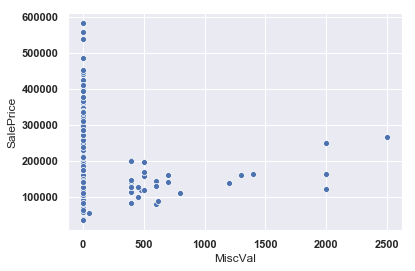

In [2127]:
sns.scatterplot(x='MiscVal', y='SalePrice', data=house_price)

Outlier check and removal for MiscVal

{'whiskers': [<matplotlib.lines.Line2D at 0x1cb0b411d68>,
 'caps': [<matplotlib.lines.Line2D at 0x1cb0b4194a8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1cb0b411940>],
 'medians': [<matplotlib.lines.Line2D at 0x1cb0b419ba8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1cb0b419f28>],
 'means': []}

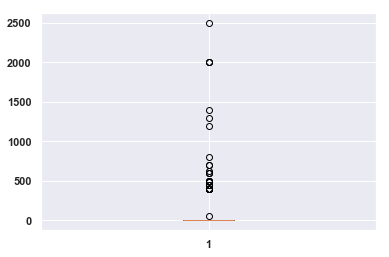

In [2128]:
# outlier treatment for MiscVal
sns.set(font_scale = 1)
plt.boxplot(house_price.MiscVal)
#Q1 = house_price.MiscVal.quantile(0.25)
#Q3 = house_price.MiscVal.quantile(0.75)
#IQR = Q3 - Q1
#house_price_MiscVal_outliers = house_price[(house_price.MiscVal < Q1 - 1.5*IQR) | (house_price.MiscVal > Q3 + 1.5*IQR)]
#house_price = house_price[(house_price.MiscVal >= Q1 - 1.5*IQR) & (house_price.MiscVal <= Q3 + 1.5*IQR)]

Since almost all values are zero and not much variability in data, we will drop this column.

In [2129]:
house_price.drop('MiscVal',axis=1,inplace=True)

#### MoSold against SalePrice
Month Sold (MM)

In [2130]:
house_price.MoSold.value_counts()

7     178
6     175
5     142
4     105
8      90
3      72
10     69
11     57
9      49
1      42
2      41
12     40
Name: MoSold, dtype: int64

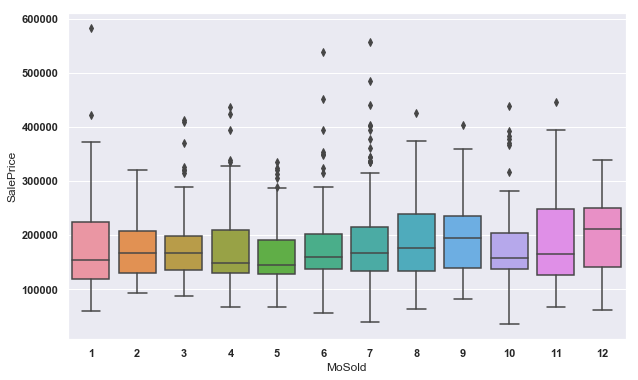

In [2131]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'MoSold', y = 'SalePrice', data = house_price)

#### YrSold against SalePrice
Year Sold (YYYY)

In [2132]:
house_price.YrSold.value_counts()

2006    241
2009    239
2007    237
2008    218
2010    125
Name: YrSold, dtype: int64

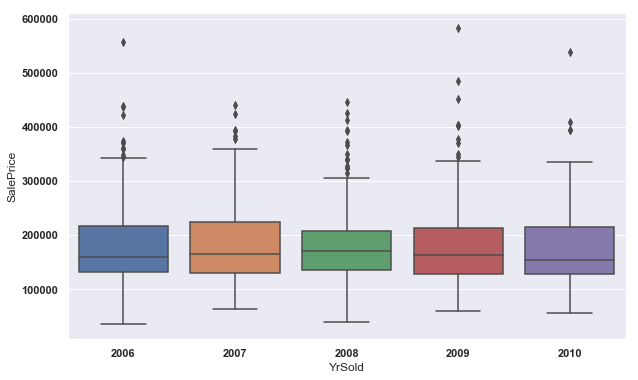

In [2133]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'YrSold', y = 'SalePrice', data = house_price)

In [2134]:
#np.random.randn(sLength)
house_price['dummy'] = pd.Series(1, index=house_price.index)
house_price['SoldDate'] = pd.to_datetime(house_price[['YrSold', 'MoSold', 'dummy']].rename(columns={'YrSold': 'year', 'MoSold': 'month', 'dummy':'day'}))
house_price.drop('dummy',axis=1,inplace=True)

#### SoldDate against SalePrice

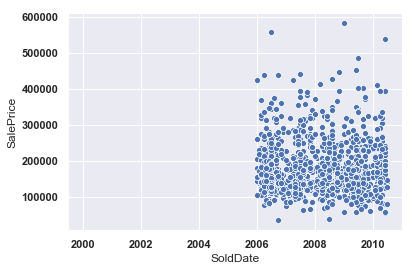

In [2135]:
sns.scatterplot(x='SoldDate', y='SalePrice', data=house_price)

In [2136]:
# grouping by year and month
house_price_time = house_price.groupby(["YrSold", "MoSold"]).SalePrice.mean()
house_price_time.head()

YrSold  MoSold
2006    1         210571.428571
        2         182900.000000
        3         191738.333333
        4         185330.761905
        5         160581.166667
Name: SalePrice, dtype: float64

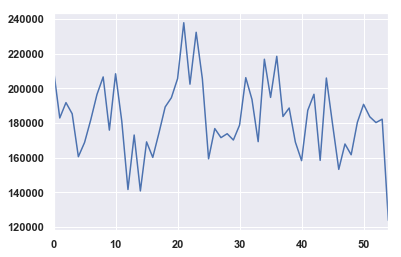

In [2137]:
# tsplot
sns.tsplot(data=house_price_time)
plt.show()

#### SaleType against SalePrice
Type of sale
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other

In [2138]:
house_price.SaleType.value_counts()

WD       904
New      107
COD       31
CWD        4
ConLw      4
ConLD      4
ConLI      3
Con        2
Oth        1
Name: SaleType, dtype: int64

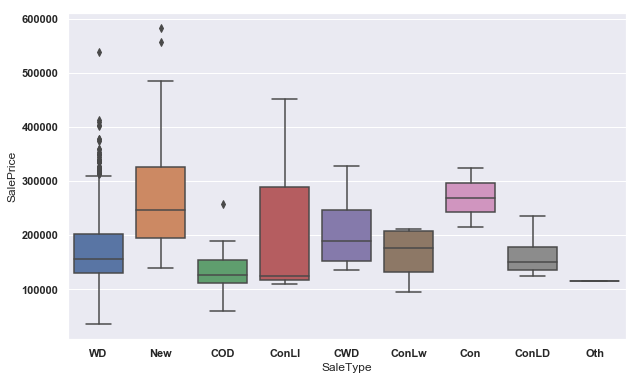

In [2139]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = house_price)

#### SaleCondition against SalePrice
Condition of sale

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

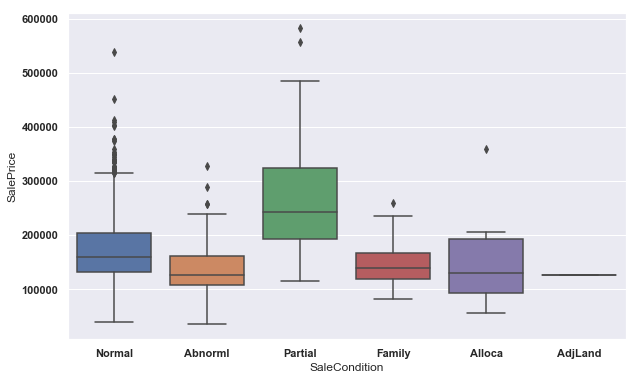

In [2140]:
plt.figure(figsize=(10, 6))
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = house_price)

#### Checking the correlations

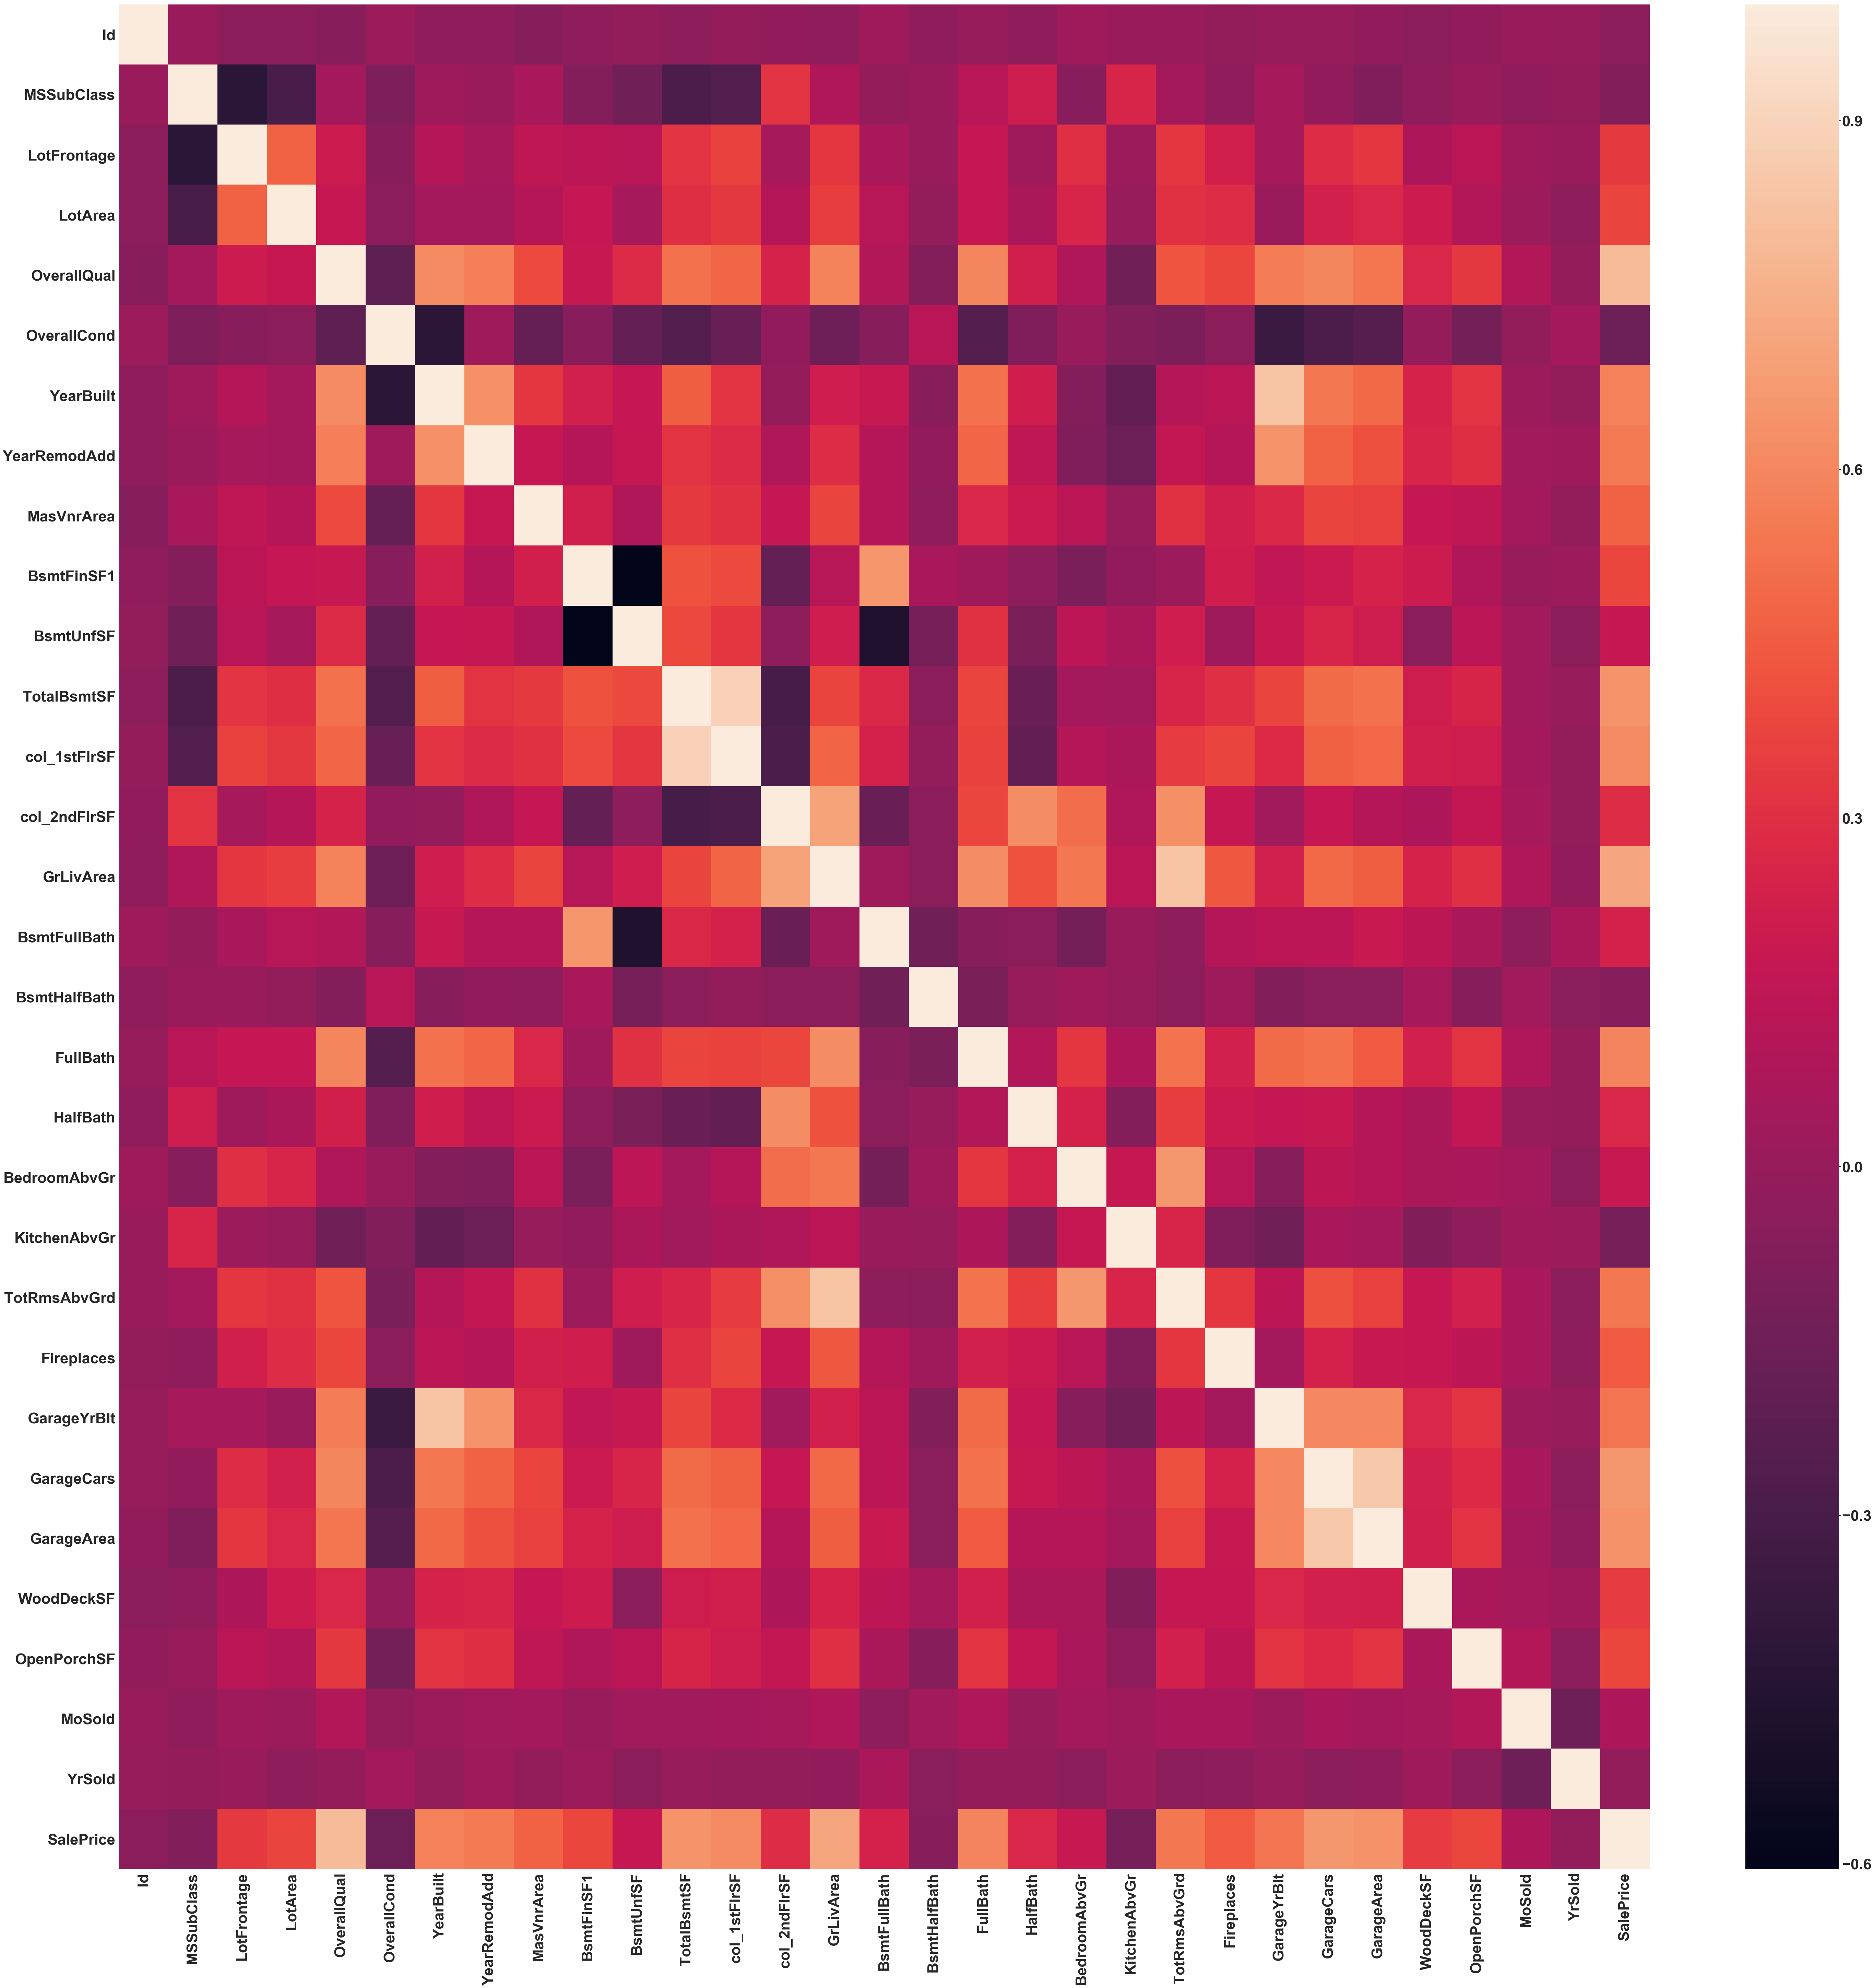

In [2141]:
# Let's see the correlation matrix 
plt.figure(figsize = (100,100))        # Size of the figure
sns.set(font_scale=4)
#corrmat = leads_data_1.iloc[:,0:29].corr()
sns.heatmap(house_price.corr())
plt.show()

We will not include Id in our further analysis as it is unique per record and will not add any value.

In [2142]:
house_price1 = house_price
house_price1.drop('Id',axis=1,inplace=True)

In [2143]:
pd.set_option('display.max_columns', None)
house_price1.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle Exterior1st Exterior2nd  \
0            5       2003          2003     Gable     VinylSd     VinylSd   
1            8       1976          1976     Gable     MetalSd     MetalSd   
2            5       2001          2002     Gable     VinylSd     VinylSd   
3            5       1915          1970     Gable     Wd Sdng     Wd Shng   
4            5       2000          2000     Gable     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc       Gd       TA   
1       None         0.0        TA        TA     CBlock       Gd       TA   
2    BrkFace       162.0        Gd        TA      PConc       Gd       TA   
3       None         0.0        TA        TA     BrkTil       TA       Gd   
4    BrkFace       350.0        Gd        TA      PConc       Gd       TA   

  BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF  \
0           No          GLQ         706          Unf        150          856   
1           Gd          ALQ         978          Unf        284         1262   
2           Mn          GLQ         486          Unf        434          920   
3           No          ALQ         216          Unf        540          756   
4           Av          GLQ         655          Unf        490         1145   

  Heating HeatingQC CentralAir Electrical  col_1stFlrSF  col_2ndFlrSF  \
0    GasA        Ex          Y      SBrkr           856           854   
1    GasA        Ex          Y      SBrkr          1262             0   
2    GasA        Ex          Y      SBrkr           920           866   
3    GasA        Gd          Y      SBrkr           961           756   
4    GasA        Ex          Y      SBrkr          1145          1053   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces GarageType  \
0             1          Gd             8        Typ           0     Attchd   
1             1          TA             6        Typ           1     Attchd   
2             1          Gd             6        Typ           1     Attchd   
3             1          Gd             7        Typ           1     Detchd   
4             1          Gd             9        Typ           1     Attchd   

   GarageYrBlt GarageFinish  GarageCars  GarageArea GarageQual GarageCond  \
0       2003.0          RFn           2         548         TA         TA   
1       1976.0          RFn           2         460         TA         TA   
2       2001.0          RFn           2         608         TA         TA 

#### Creating Dummy Variables

Checking if there are variables having 2 values so that they can be changed into 1/0.

In [2144]:
for col in house_price1.columns:
    if (len(house_price1[col].unique()) == 2):
        print(col)
        print(house_price1[col].value_counts())
        print()

CentralAir
Y    1003
N      57
Name: CentralAir, dtype: int64



In [2145]:
#house_price1.Street = house_price1.Street.map({'Pave': 1, 'Grvl': 0})
house_price1.CentralAir = house_price1.CentralAir.map({'Y': 1, 'N': 0})

YearBuilt and YearRemodAdd we will convert to 2 new columns No of years since built and No of years since Remodified.
Also SoldDate we will convert to months_since_sold.
We will consider all these 3 as numeric columns and scale them as other numeric columns.

In [2146]:
house_price1['years_since_built'] = datetime.datetime.now().year - house_price1.YearBuilt
house_price1['years_since_remod'] = datetime.datetime.now().year - house_price1.YearRemodAdd
house_price1['years_since_garage_built'] = datetime.datetime.now().year - house_price1.GarageYrBlt

house_price1['months_since_sold'] = ((datetime.datetime.now() - house_price1.SoldDate)/np.timedelta64(1, 'M')).astype(int)
#datetime.datetime.now().dt.to_period('M') - house_price1.SoldDate.dt.to_period('M')

Outlier Check and Removal for years_since_built

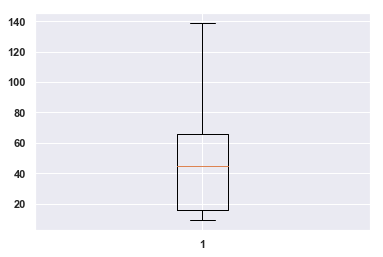

In [2147]:
# outlier treatment for years_since_built
sns.set(font_scale = 1)
plt.boxplot(house_price.years_since_built)
Q1 = house_price.years_since_built.quantile(0.25)
Q3 = house_price.years_since_built.quantile(0.75)
IQR = Q3 - Q1
house_price_years_since_built_outliers = house_price[(house_price.years_since_built < Q1 - 1.5*IQR) | (house_price.years_since_built > Q3 + 1.5*IQR)]
house_price = house_price[(house_price.years_since_built >= Q1 - 1.5*IQR) & (house_price.years_since_built <= Q3 + 1.5*IQR)]

Outlier Check and Removal for years_since_remod

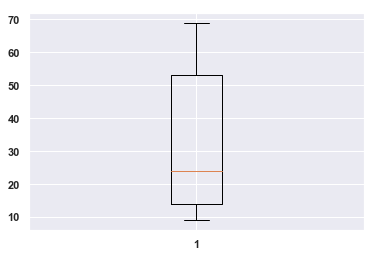

In [2148]:
# outlier treatment for years_since_remod
sns.set(font_scale = 1)
plt.boxplot(house_price.years_since_remod)
Q1 = house_price.years_since_remod.quantile(0.25)
Q3 = house_price.years_since_remod.quantile(0.75)
IQR = Q3 - Q1
house_price_years_since_remod_outliers = house_price[(house_price.years_since_remod < Q1 - 1.5*IQR) | (house_price.years_since_remod > Q3 + 1.5*IQR)]
house_price = house_price[(house_price.years_since_remod >= Q1 - 1.5*IQR) & (house_price.years_since_remod <= Q3 + 1.5*IQR)]

Outlier Check and Removal for months_since_sold

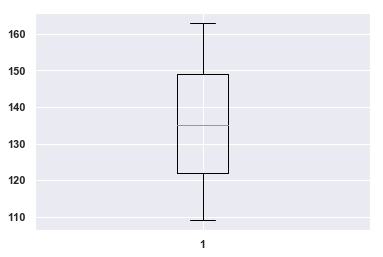

In [2149]:
# outlier treatment for months_since_sold
sns.set(font_scale = 1)
plt.boxplot(house_price.months_since_sold)
Q1 = house_price.months_since_sold.quantile(0.25)
Q3 = house_price.months_since_sold.quantile(0.75)
IQR = Q3 - Q1
house_price_months_since_sold_outliers = house_price[(house_price.months_since_sold < Q1 - 1.5*IQR) | (house_price.months_since_sold > Q3 + 1.5*IQR)]
house_price = house_price[(house_price.months_since_sold >= Q1 - 1.5*IQR) & (house_price.months_since_sold <= Q3 + 1.5*IQR)]

Outlier Check and Removal for years_since_garage_built

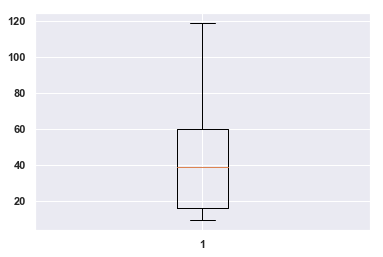

In [2150]:
# outlier treatment for years_since_garage_built
sns.set(font_scale = 1)
plt.boxplot(house_price.years_since_garage_built)
Q1 = house_price.years_since_garage_built.quantile(0.25)
Q3 = house_price.years_since_garage_built.quantile(0.75)
IQR = Q3 - Q1
house_price_years_since_garage_built_outliers = house_price[(house_price.years_since_garage_built < Q1 - 1.5*IQR) | (house_price.years_since_garage_built > Q3 + 1.5*IQR)]
house_price = house_price[(house_price.years_since_garage_built >= Q1 - 1.5*IQR) & (house_price.years_since_garage_built <= Q3 + 1.5*IQR)]

Drop the date columns YearBuilt, YearRemodAdd, SoldDate now

In [2151]:
house_price1.drop(['YearBuilt','YearRemodAdd','SoldDate','MoSold','YrSold','GarageYrBlt'],axis=1,inplace=True)
#house_price1.drop(['SoldDate','MoSold','YrSold'],axis=1,inplace=True)

In [2152]:
house_price1.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1 BldgType HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm     1Fam     2Story            7   
1       Gtl      Veenker      Feedr     1Fam     1Story            6   
2       Gtl      CollgCr       Norm     1Fam     2Story            7   
3       Gtl      Crawfor       Norm     1Fam     2Story            7   
4       Gtl      NoRidge       Norm     1Fam     2Story            8   

   OverallCond RoofStyle Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
0            5     Gable     VinylSd     VinylSd    BrkFace       196.0   
1            8     Gable     MetalSd     MetalSd       None         0.0   
2            5     Gable     VinylSd     VinylSd    BrkFace       162.0   
3            5     Gable     Wd Sdng     Wd Shng       None         0.0   
4            5     Gable     VinylSd     VinylSd    BrkFace       350.0   

  ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1  \
0        Gd        TA      PConc       Gd       TA           No          GLQ   
1        TA        TA     CBlock       Gd       TA           Gd          ALQ   
2        Gd        TA      PConc       Gd       TA           Mn          GLQ   
3        TA        TA     BrkTil       TA       Gd           No          ALQ   
4        Gd        TA      PConc       Gd       TA           Av          GLQ   

   BsmtFinSF1 BsmtFinType2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC  \
0         706          Unf        150          856    GasA        Ex   
1         978          Unf        284         1262    GasA        Ex   
2         486          Unf        434          920    GasA        Ex   
3         216          Unf        540          756    GasA        Gd   
4         655          Unf        490         1145    GasA        Ex   

   CentralAir Electrical  col_1stFlrSF  col_2ndFlrSF  GrLivArea  BsmtFullBath  \
0           1      SBrkr           856           854       1710             1   
1           1      SBrkr          1262             0       1262             0   
2           1      SBrkr           920           866       1786             1   
3           1      SBrkr           961           756       1717             1   
4           1      SBrkr          1145          1053       2198             1   

   BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr KitchenQual  \
0             0         2         1             3             1          Gd   
1             1         2         0             3             1          TA   
2             0         2         1             3             1          Gd   
3             0         1         0             3             1          Gd   
4             0         2         1             4             1          Gd   

   TotRmsAbvGrd Functional  Fireplaces GarageType GarageFinish  GarageCars  \
0             8        Typ           0     Attchd          RFn           2   
1             6        Typ           1     Attchd          RFn           2   
2             6        Typ           1     Attchd          RFn           2   
3             7        Typ           1     Detchd          Unf           3   
4             9        Typ           1     Attchd          RFn           3   

   GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
0         548         TA         TA          Y           0           61   
1         460         TA         TA          Y         298            0   
2         608         TA         TA          Y           0           42   

Now we will create dummy variables for the below categorical variables:
BsmtFinType1,BsmtFinType2,Heating,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,
SaleType,SaleCondition

In [2153]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(house_price1[['MSSubClass','MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive', 'SaleType','SaleCondition']], drop_first=True)

# Adding the results to the master dataframe
house_price1 = pd.concat([house_price1, dummy1], axis=1)



In [2154]:
house_price1.drop(['MSSubClass','MSZoning','LotShape','LandContour','LotConfig','LandSlope','Neighborhood','Condition1','BldgType','HouseStyle','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Heating','HeatingQC','Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive', 'SaleType','SaleCondition'],axis=1,inplace=True)

In [2155]:
house_price1.head()

LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  BsmtFinSF1  \
0         65.0     8450            7            5       196.0         706   
1         80.0     9600            6            8         0.0         978   
2         68.0    11250            7            5       162.0         486   
3         60.0     9550            7            5         0.0         216   
4         84.0    14260            8            5       350.0         655   

   BsmtUnfSF  TotalBsmtSF  CentralAir  col_1stFlrSF  col_2ndFlrSF  GrLivArea  \
0        150          856           1           856           854       1710   
1        284         1262           1          1262             0       1262   
2        434          920           1           920           866       1786   
3        540          756           1           961           756       1717   
4        490         1145           1          1145          1053       2198   

   BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  KitchenAbvGr  \
0             1             0         2         1             3             1   
1             0             1         2         0             3             1   
2             1             0         2         1             3             1   
3             1             0         1         0             3             1   
4             1             0         2         1             4             1   

   TotRmsAbvGrd  Fireplaces  GarageCars  GarageArea  WoodDeckSF  OpenPorchSF  \
0             8           0           2         548           0           61   
1             6           1           2         460         298            0   
2             6           1           2         608           0           42   
3             7           1           3         642           0           35   
4             9           1           3         836         192           84   

   SalePrice  years_since_built  years_since_remod  years_since_garage_built  \
0     208500                 16                 16                      16.0   
1     181500                 43                 43                      43.0   
2     223500                 18                 17                      18.0   
3     140000                104                 49                      21.0   
4     250000                 19                 19                      19.0   

   months_since_sold  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                138            0            0            1            0   
1                147            0            0            1            0   
2                131            0            0            1            0   
3                162            0            0            1            0   
4                128            0            0            1            0   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_HLS  LandContour_Low  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   
3             0             0             0                0                0   
4             0             0             0                0                0   

   LandContour_Lvl  LotConfig_CulDSac  LotConfig_FR2  LotConfig_FR3  \
0                1                  0              0              0   
1                1                  0              1              0   
2                1                  0              0              0   
3                1                  0              0              0   
4                1                  0              1              0   

   LotConfig_Inside  LandSlope_Mod  LandSlope_Sev  Neighborhood_Blueste  \
0                 1              0              0                     0   
1                 0              0              0                     0   
2             

Distribution of SalePrice 

Text(0.5, 0, 'Sale Prices')

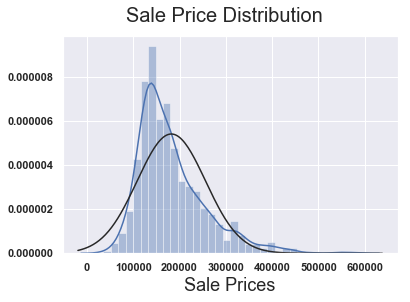

In [2156]:
# Plot the histogram of the SalePrice
fig = plt.figure()
sns.distplot((house_price1.SalePrice), fit=norm)
fig.suptitle('Sale Price Distribution', fontsize = 20)                  # Plot heading 
plt.xlabel('Sale Prices', fontsize = 18)                         # X-label
#sns.distplot(train_data['SalePrice'], fit=norm);

Probability Plot of SalePrice

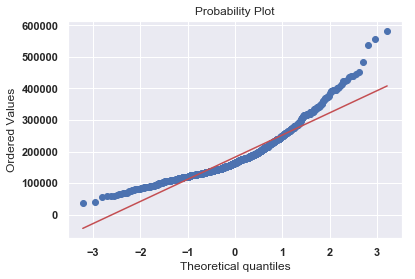

In [2157]:
fig = plt.figure()
res = stats.probplot(house_price1['SalePrice'], plot=plt)
plt.show()

In [2158]:
#This is not normally distributed and is skewed
print()
print("Skew is: %f" % house_price1['SalePrice'].skew()) 


Skew is: 1.414474


In [2159]:
import scipy
from scipy.stats import skewtest
scipy.stats.skewtest(house_price1['SalePrice'], axis=0)#, nan_policy='propagate')

SkewtestResult(statistic=14.431824410421362, pvalue=3.263333895523656e-47)

We need to remove the skewness as machine learning models work better with normally distributed targets rather than skewed targets, so we will use numpy fuction log1p which  applies log(1+x) to all elements of the column. 


In [2160]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
house_price1["SalePrice"] = np.log1p(house_price1["SalePrice"])


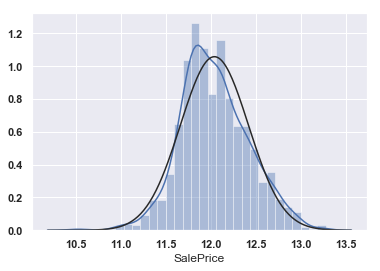

In [2161]:

#Check the new distribution 
sns.distplot(house_price1['SalePrice'] , fit=norm);

In [2162]:
#This is normally distributed now
print()
print("Skew is: %f" % house_price1['SalePrice'].skew()) 


Skew is: 0.163020


In [2163]:
import scipy
from scipy.stats import skewtest
scipy.stats.skewtest(house_price1['SalePrice'], axis=0)#, nan_policy='propagate')

SkewtestResult(statistic=2.1648866804220845, pvalue=0.030396364484259787)

In [2164]:
house_price1['SalePrice'].head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

#### Now the test-train split.

In [2165]:
from sklearn.model_selection import train_test_split

In [2166]:
# Splitting the data into train and test
col_names = house_price1.columns
dftrain, dftest = train_test_split(house_price1, train_size=0.7, test_size=0.3, random_state=100)

#### Feature Scaling

In [2167]:
#from sklearn.preprocessing import StandardScaler

In [2168]:
#scaler = StandardScaler()
#dftrain = pd.DataFrame(scaler.fit_transform(dftrain))
#dftrain.columns = col_names
#dftrain.head()

In [2169]:
#dftest = pd.DataFrame(scaler.transform(dftest))
#dftest.columns = col_names
#dftest.head()

In [2170]:
X_train = dftrain.drop(['SalePrice'], axis=1)
X_test  = dftest.drop(['SalePrice'], axis=1)
y_train = dftrain['SalePrice']
y_test  = dftest['SalePrice']

#### Lasso Regression

In [2171]:
lasso = Lasso()
#lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
folds = 5
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 700, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', #'neg_mean_absolute_error', #'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 29 candidates, totalling 145 fits


[Parallel(n_jobs=1)]: Done 145 out of 145 | elapsed:    9.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 700, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [2172]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.514664      0.257281         0.065699        0.101829      0.0001   
1       0.313847      0.039691         0.000604        0.000808       0.001   
2       0.207383      0.078741         0.000601        0.000491        0.01   
3       0.091470      0.032861         0.002804        0.002644        0.05   
4       0.063419      0.003931         0.000403        0.000806         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.879385           0.919822           0.874060   
1   {'alpha': 0.001}           0.882632           0.913911           0.900812   
2    {'alpha': 0.01}           0.861757           0.888063           0.885492   
3    {'alpha': 0.05}           0.807735           0.840489           0.845582   
4     {'alpha': 0.1}           0.796325           0.824034           0.826403   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.928714           0.891513         0.898701        0.021808   
1           0.915506           0.900894         0.902739        0.011840   
2           0.880505           0.880641         0.879280        0.009247   
3           0.834061           0.840041         0.833556        0.013447   
4           0.818775           0.823726         0.817832        0.011062   

   rank_test_score  split0_train_score  split1_train_score  \
0                2            0.955130            0.947715   
1                1            0.934392            0.927409   
2                3            0.890699            0.885191   
3                4            0.843614            0.839353   
4                5            0.833567            0.824884   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.957406            0.944290            0.952842   
1            0.931907            0.922121            0.930337   
2            0.887220            0.886374            0.887790   
3            0.841116            0.843283            0.846623   
4            0.824214            0.826427            0.826631   

   mean_train_score  std_train_score  
0          0.951477         0.004820  
1          0.929233         0.004216  
2          0.887455         0.001843  
3          0.842798         0.002459  
4          0.827144         0.003338

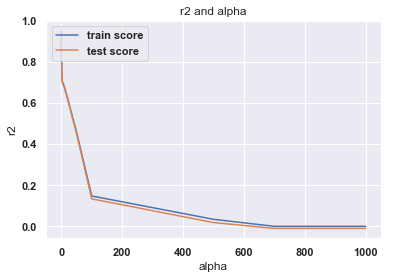

In [2173]:
sns.set(font_scale=1)
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')

plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [2174]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9027389682417251 corresponding to hyperparameters {'alpha': 0.001}


Optimal Value of lambda for Lasso Regression seems to be 500, as beyond that there slight decrease in r2 for test data.

In [2175]:
alpha = 0.001 #500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [2176]:
len(lasso.coef_)

200

In [2177]:
197/2

98.5

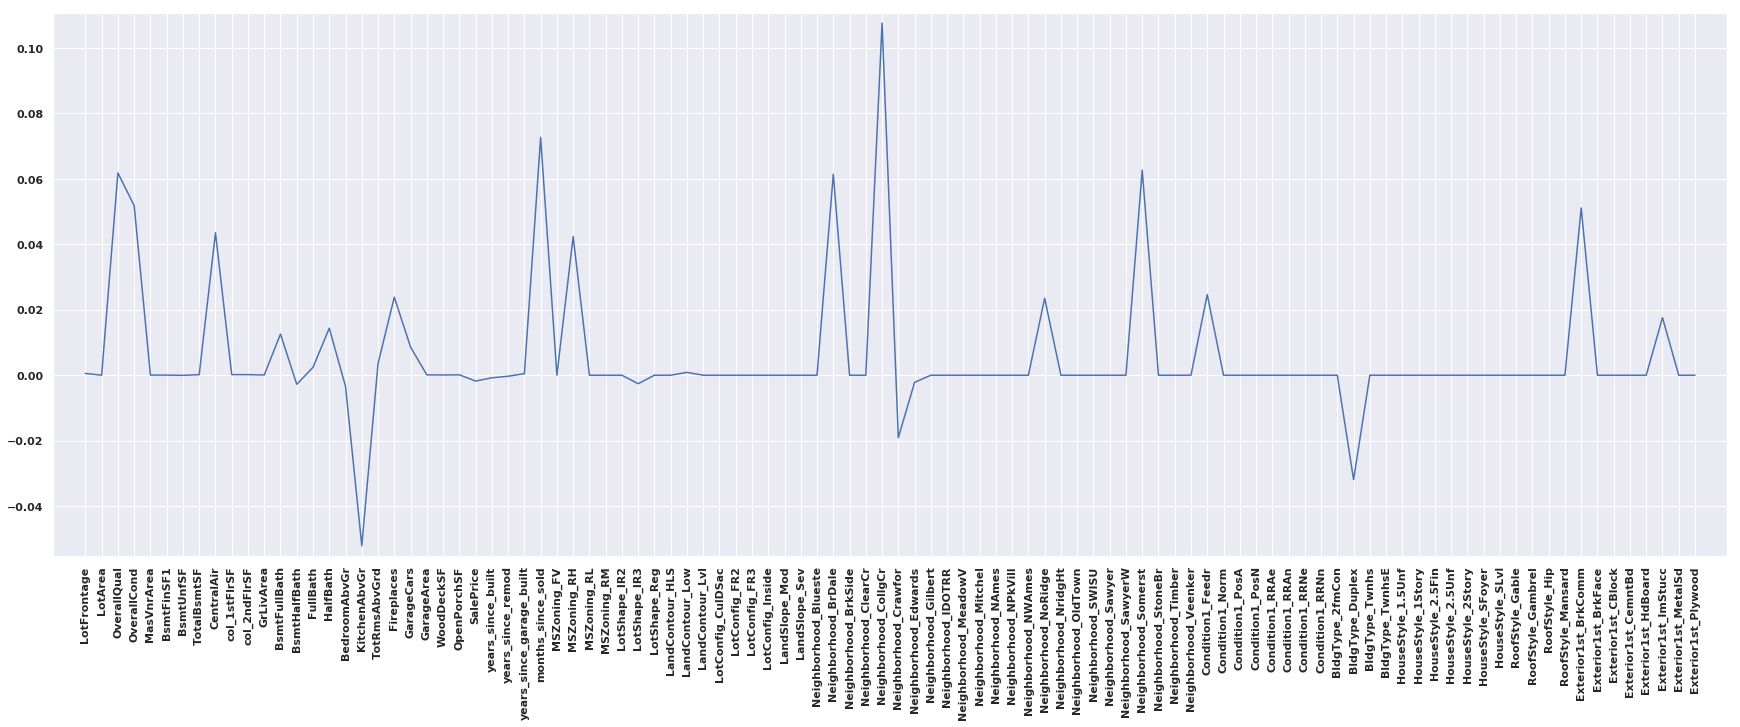

In [2178]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

plt.figure(figsize=(30,10))
lasso_coef = lasso.coef_
# Plot the coefficients
plt.plot(range(len(col_names[0:100])), lasso_coef[0:100])
plt.xticks(range(len(col_names[0:100])), col_names[0:100].values, rotation=90) 
plt.margins(0.02)
#sns.set(font_scale=1.5)
plt.show()

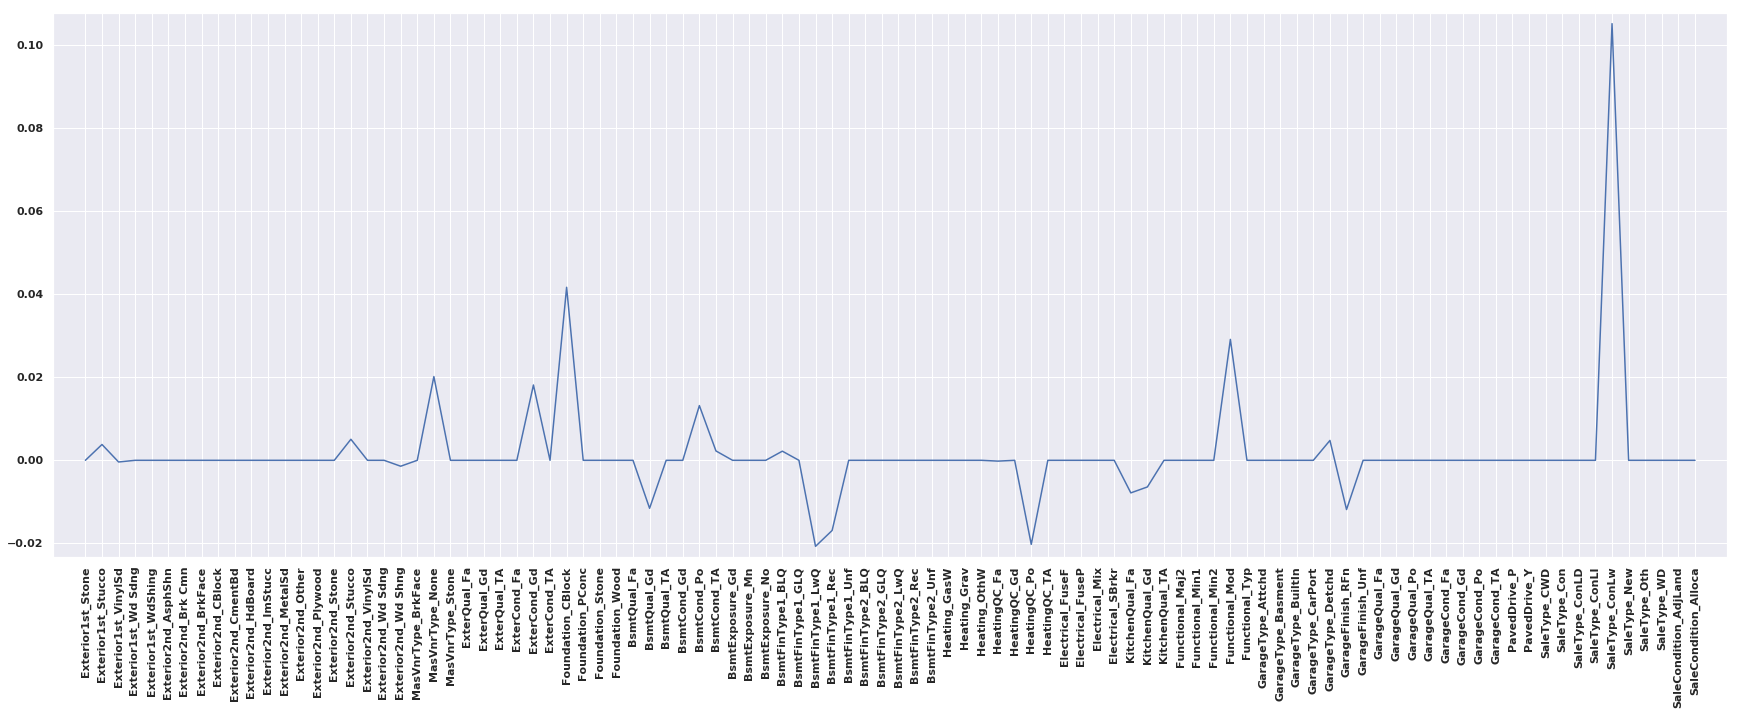

In [2179]:
plt.figure(figsize=(30,10))
lasso_coef = lasso.coef_
# Plot the coefficients
plt.plot(range(len(col_names[100:198])), lasso_coef[100:198])
plt.xticks(range(len(col_names[100:198])), col_names[100:198].values, rotation=90) 
plt.margins(0.02)
#sns.set(font_scale=1.5)
plt.show()

As can be seen, many of the coefficients have been marked to zero by Lasso Regularization, as a result feature elimination along with complexity reduction.

Same data preparation steps on test data

In [2180]:
 #X_train, X_test, y_train, y_test
y_test_pred = np.expm1(lasso.predict(X_test))

In [2181]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
#y_test_pred = ['{:f}'.format(item) for item in y_test_pred]
y_test_pred = pd.DataFrame(y_test_pred)
y_test_pred=y_test_pred.apply(lambda x: x.round(0))
y_test_pred.head()

0
0  204910.0
1  162902.0
2  165855.0
3  171835.0
4  253890.0

In [2182]:
y_test = np.expm1(y_test)
y_test.head()

139     231500.0
754     156000.0
624     165150.0
1273    177000.0
468     250000.0
Name: SalePrice, dtype: float64

#### Model Evaluation Lasso

(array([0.000000, 100000.000000, 200000.000000, 300000.000000,
        400000.000000, 500000.000000, 600000.000000, 700000.000000]),
 <a list of 8 Text xticklabel objects>)

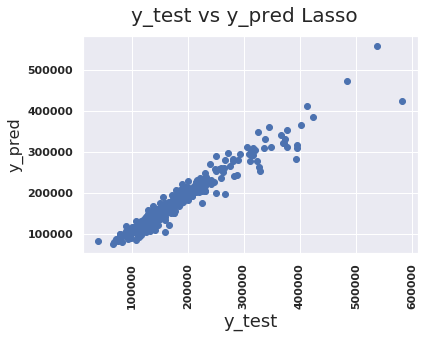

In [2183]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred Lasso', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label
plt.xticks(rotation=90)

In [2202]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.9276262739559612

In [2205]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_pred)
#13811.66981132077

13811.66981132077

In [2209]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_pred)
#463841254.61949706
#434951241.81761026

463841254.61949706

#### Ridge Regression

Ridge Regression will not eliminate the unimportant features by marking their coefficients to zero, but will make insignificant features' coefficients close to zero.

In [2186]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='r2', verbose=1)

In [2187]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.237468      0.458816         0.005615        0.011230      0.0001   
1       0.004828      0.003942         0.004439        0.002948       0.001   
2       0.005838      0.003009         0.000999        0.000632        0.01   
3       0.005597      0.000489         0.000798        0.000399        0.05   
4       0.005597      0.000490         0.000800        0.000400         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.863737           0.904810           0.846264   
1   {'alpha': 0.001}           0.863818           0.904882           0.846456   
2    {'alpha': 0.01}           0.864569           0.905535           0.848253   
3    {'alpha': 0.05}           0.866953           0.907581           0.854265   
4     {'alpha': 0.1}           0.868674           0.909191           0.859133   

   split3_test_score  split4_test_score  mean_test_score  std_test_score  \
0           0.914718           0.870444         0.880006        0.025737   
1           0.915010           0.870561         0.880157        0.025760   
2           0.917215           0.871624         0.881449        0.025844   
3           0.921865           0.875104         0.885159        0.025432   
4           0.924667           0.878131         0.887962        0.024879   

   rank_test_score  split0_train_score  split1_train_score  \
0               26            0.958196            0.951376   
1               25            0.958195            0.951375   
2               24            0.958190            0.951369   
3               23            0.958095            0.951262   
4               22            0.957899            0.951044   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.960432            0.947219            0.955834   
1            0.960432            0.947219            0.955834   
2            0.960424            0.947209            0.955827   
3            0.960281            0.947094            0.955727   
4            0.959991            0.946881            0.955520   

   mean_train_score  std_train_score  
0          0.954611         0.004761  
1          0.954611         0.004761  
2          0.954604         0.004762  
3          0.954492         0.004758  
4          0.954267         0.004743

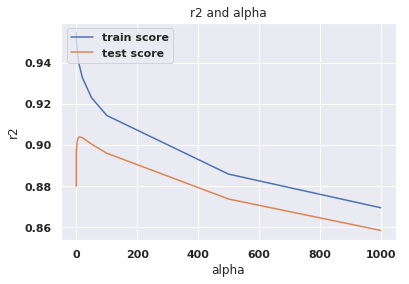

In [2188]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [2189]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9040147493320834 corresponding to hyperparameters {'alpha': 10.0}


Here ideal value of alpha here is aroud 100, after which r2 score for test gradually starts decreasing.

In [2190]:
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([0.000573, 0.000006, 0.054658, 0.048332, 0.000046, 0.000014,
       -0.000047, 0.000165, 0.052739, 0.000158, 0.000147, 0.000091,
       0.013974, -0.016453, 0.018887, 0.029813, -0.005006, -0.044631,
       0.004091, 0.025853, 0.018739, 0.000065, 0.000065, 0.000106,
       -0.001230, -0.000759, -0.000250, 0.000506, 0.060179, 0.004677,
       0.044544, 0.005883, -0.018930, 0.005056, -0.005546, 0.019294,
       -0.029540, 0.011934, 0.021001, -0.000214, -0.012859, 0.006420,
       -0.012687, -0.046472, -0.004332, -0.022145, 0.051254, -0.008811,
       -0.008379, 0.087635, -0.037147, -0.028920, -0.013348, -0.045994,
       -0.001937, -0.008653, 0.012964, -0.023563, -0.002397, 0.027370,
       -0.021645, -0.016818, -0.007001, -0.006224, 0.019699, 0.065903,
       -0.004505, 0.017422, 0.018660, 0.036796, -0.003251, 0.023098,
       -0.016427, 0.002085, 0.004527, 0.004668, -0.003209, -0.023972,
       -0.049401, -0.017596, -0.005931, 0.003925, 0.002699, -0.011357,
       -0.000889, 0.015

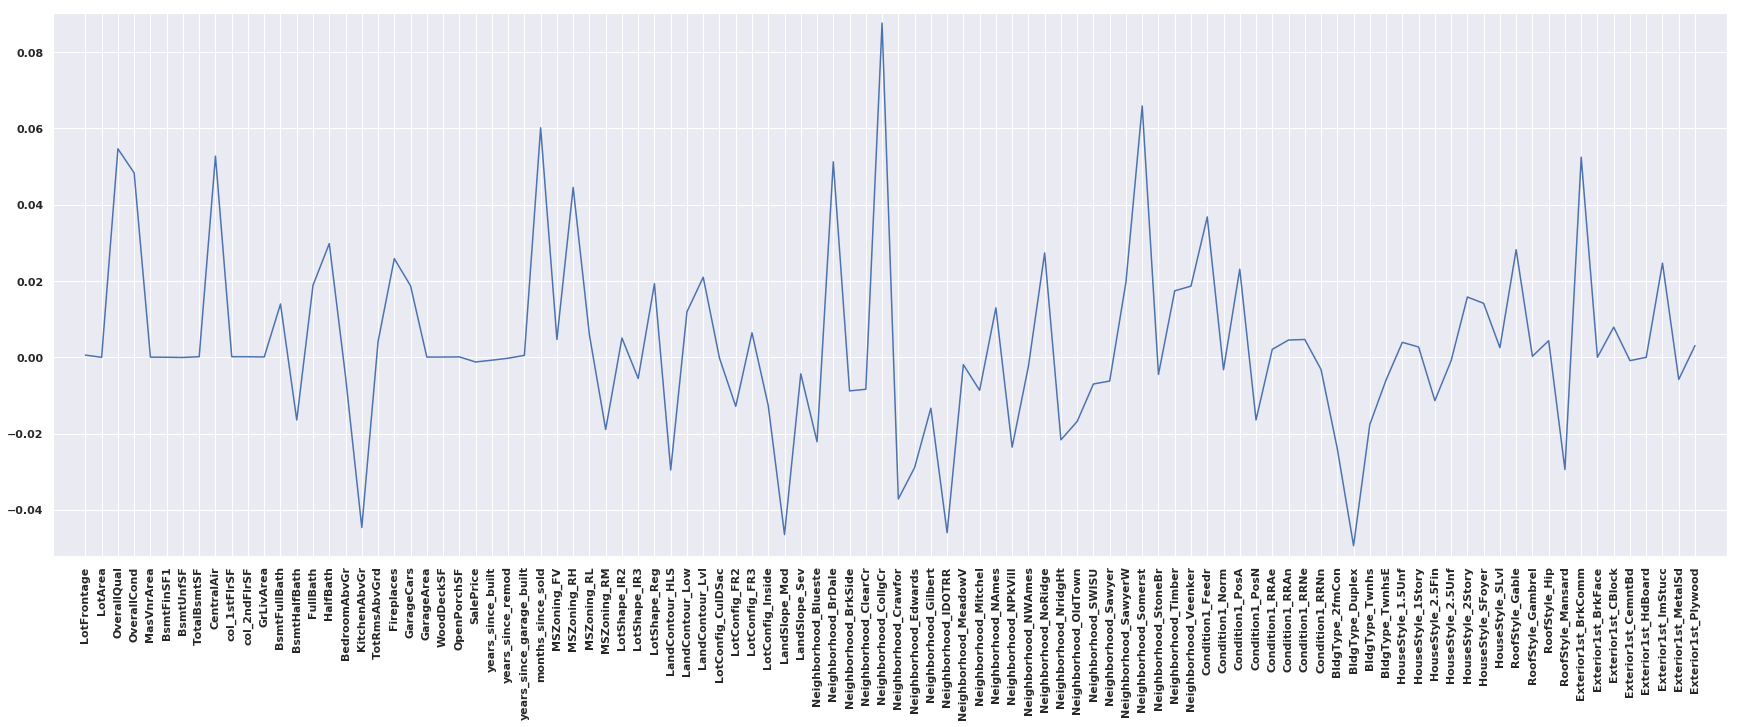

In [2191]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 26}

plt.rc('font', **font)

plt.figure(figsize=(30,10))
ridge_coef = ridge.coef_
# Plot the coefficients
plt.plot(range(len(col_names[0:100])), ridge_coef[0:100])
plt.xticks(range(len(col_names[0:100])), col_names[0:100].values, rotation=90) 
plt.margins(0.02)
#sns.set(font_scale=1.5)
plt.show()

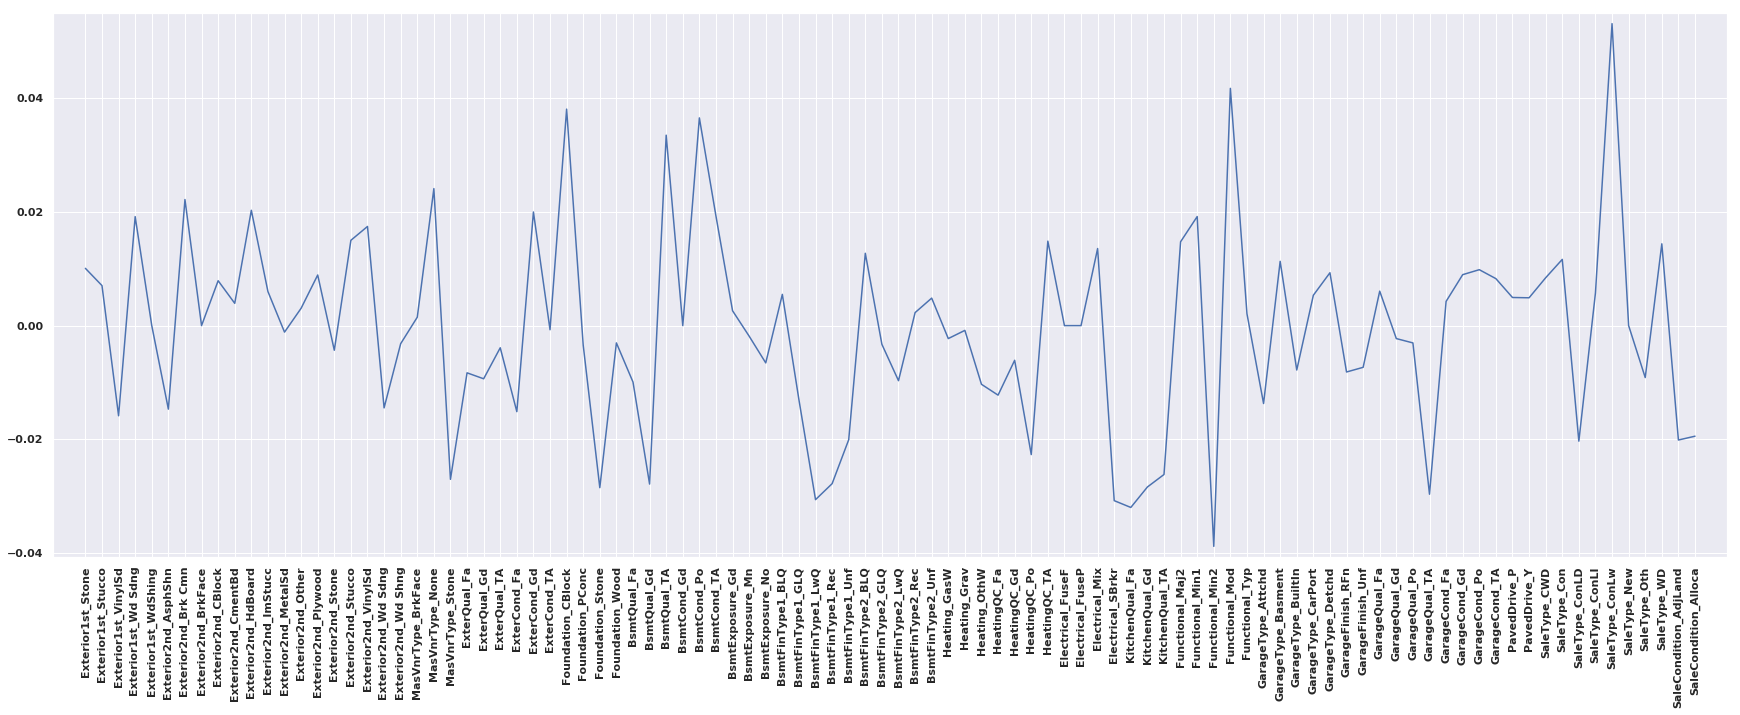

In [2192]:
plt.figure(figsize=(30,10))
ridge_coef = ridge.coef_
# Plot the coefficients
plt.plot(range(len(col_names[100:198])), ridge_coef[100:198])
plt.xticks(range(len(col_names[100:198])), col_names[100:198].values, rotation=90) 
plt.margins(0.02)
#sns.set(font_scale=1.5)
plt.show()

In [2193]:
 #X_train, X_test, y_train, y_test
y_test_ridge_pred = np.expm1(ridge.predict(X_test))

In [2194]:
np.set_printoptions(formatter={'float_kind':'{:f}'.format})
#y_test_pred = ['{:f}'.format(item) for item in y_test_pred]
y_test_ridge_pred = pd.DataFrame(y_test_ridge_pred)
y_test_ridge_pred=y_test_ridge_pred.apply(lambda x: x.round(0))
y_test_ridge_pred.head()

0
0  208873.0
1  160031.0
2  167042.0
3  169857.0
4  253340.0

(array([0.000000, 100000.000000, 200000.000000, 300000.000000,
        400000.000000, 500000.000000, 600000.000000, 700000.000000]),
 <a list of 8 Text xticklabel objects>)

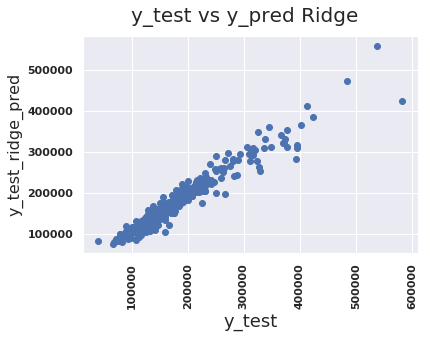

In [2195]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred Ridge', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_test_ridge_pred', fontsize=16)                          # Y-label
plt.xticks(rotation=90)

In [2200]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_ridge_pred)
#0.9117631030156981

0.9321340184722349

In [2207]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_test_ridge_pred)
#13811.66981132077
#13426.66666666668

13426.66666666668

In [2208]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_test_ridge_pred)
#13811.66981132077
#434951241.81761026

434951241.81761026

In [2198]:
lasso_coef

array([0.000545, 0.000005, 0.061822, 0.051831, 0.000049, 0.000035,
       -0.000038, 0.000164, 0.043533, 0.000180, 0.000180, 0.000073,
       0.012575, -0.002782, 0.002414, 0.014378, -0.003433, -0.052112,
       0.003595, 0.023848, 0.008606, 0.000109, 0.000066, 0.000119,
       -0.001782, -0.000792, -0.000317, 0.000472, 0.072693, 0.000000,
       0.042361, -0.000000, -0.000000, 0.000000, -0.002592, 0.000000,
       -0.000000, 0.000873, 0.000000, 0.000000, -0.000000, -0.000000,
       -0.000000, -0.000000, -0.000000, -0.000000, 0.061431, -0.000000,
       -0.000000, 0.107641, -0.019105, -0.002177, -0.000000, -0.000000,
       0.000000, -0.000000, 0.000000, -0.000000, -0.000000, 0.023527,
       -0.000000, -0.000000, 0.000000, -0.000000, 0.000000, 0.062656,
       0.000000, 0.000000, 0.000000, 0.024651, -0.000000, 0.000000,
       -0.000000, -0.000000, 0.000000, 0.000000, 0.000000, -0.000000,
       -0.031911, -0.000000, -0.000000, -0.000000, 0.000000, -0.000000,
       -0.000000, 0.0000

In [2199]:
ridge_coef

array([0.000573, 0.000006, 0.054658, 0.048332, 0.000046, 0.000014,
       -0.000047, 0.000165, 0.052739, 0.000158, 0.000147, 0.000091,
       0.013974, -0.016453, 0.018887, 0.029813, -0.005006, -0.044631,
       0.004091, 0.025853, 0.018739, 0.000065, 0.000065, 0.000106,
       -0.001230, -0.000759, -0.000250, 0.000506, 0.060179, 0.004677,
       0.044544, 0.005883, -0.018930, 0.005056, -0.005546, 0.019294,
       -0.029540, 0.011934, 0.021001, -0.000214, -0.012859, 0.006420,
       -0.012687, -0.046472, -0.004332, -0.022145, 0.051254, -0.008811,
       -0.008379, 0.087635, -0.037147, -0.028920, -0.013348, -0.045994,
       -0.001937, -0.008653, 0.012964, -0.023563, -0.002397, 0.027370,
       -0.021645, -0.016818, -0.007001, -0.006224, 0.019699, 0.065903,
       -0.004505, 0.017422, 0.018660, 0.036796, -0.003251, 0.023098,
       -0.016427, 0.002085, 0.004527, 0.004668, -0.003209, -0.023972,
       -0.049401, -0.017596, -0.005931, 0.003925, 0.002699, -0.011357,
       -0.000889, 0.015